In [109]:
import numpy
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [110]:
from google.colab import drive
drive.mount('/content/drive')                                                   #Mounting the drive.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/are_you_happy.csv')   # opening the csv to work with.

## Displaying the dataframe and Basic Cleaning

In [112]:
display(df)
print(df.shape[0], " Rows X ", df.shape[1], " Columns.")

,Timestamp,Year of study,What is you department?,Are you currently pursuing a minor under any of the following departments/programs?,Gender,What song are you vibing to these days?,Relationship Status,Township,How frequently do you eat out?,How often do you feel homesick?,...,Are you facing Intern/placement issue?,How much are you affected by quizzes and assignments ?,"CPI (write in the text box) \nDisclaimer: This is an anonymous survey, we don't judge.",How is your social life?,How many hours do you sleep daily?,How well are you coping up with the offline semester?,Do you feel you are missing out?,Do you think your fluency in English affects your confidence?,How does your Insti life compare to your expectations? Take your time,Any feedback regarding the survey? How could we have done better?
0,10/27/2022 11:44:04,2nd,Mechanical,Centre for Machine Intelligence and Data Science,Male,NaN,In pursuit,City,Occasionally (once in a week),Sometimes,...,I am happy with my internship opportunity.,3,8.7,I like to keep my social circle small,7,I am facing difficulty with time management,"Scholastically, Socially, Extra Curriculars (C...",No,2,NaN
1,10/27/2022 12:59:03,2nd,Mechanical,Centre for Machine Intelligence and Data Science,Male,the world could end with you,Single,City,Occasionally (once in a week),Never,...,No,4,9.08,I like to keep my social circle small,5,I am facing difficulty with time management,"Scholastically, Socially",No,4,NaN
2,10/27/2022 13:43:26,2nd,Mechanical,Computer Science and Engineering,Female,Taylor Swift and Hindi,In pursuit,City,Often (more than five times a week),Only during difficult times,...,I am unable to find one that suits my interest.,4,8.68,To a point where I feel guilty of inefficient ...,5,I am facing difficulty with time management,"Scholastically, Socially",No,3,NaN
3,10/27/2022 13:43:27,2nd,Mechanical,Centre for Machine Intelligence and Data Science,Male,NaN,Single,City,Occasionally (once in a week),Sometimes,...,I am happy with my internship opportunity.,4,9.02,I like to keep my social circle small,7,I am facing difficulty with time management,Extra Curriculars (Cult activities and college...,No,4,NaN
4,10/27/2022 13:44:23,2nd,Mechanical,Computer Science and Engineering,Male,NaN,Single,City,Occasionally (once in a week),Sometimes,...,I am unable to find one that suits my interest.,3,8.65,I like to keep my social circle small,6,I am facing difficulty with time management,"Scholastically, Technical activities (Tech tea...",Yes,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,11/18/2022 11:46:18,3rd,Computer Science and Engineering,None,Male,Sunroof,Single,City,Occasionally (once in a week),Only during difficult times,...,I am happy with my internship opportunity.,3,9.6,I like to keep my social circle small,7,Its just perfect,"Socially, Extra Curriculars (Cult activities a...",Yes,3,NaN
274,11/18/2022 12:02:14,2nd,Civil,None,Female,comfortably numb-pink floyd,Single,City,Occasionally (once in a week),Always,...,No,3,NaN,I like to keep my social circle small,6,I am facing difficulty with time management,"Scholastically, Socially, Extra Curriculars (C...",No,3,"more options for each question could be given,..."
275,11/18/2022 18:40:13,3rd,Mechanical,Centre for Machine Intelligence and Data Science,Male,Until i found yoj,Committed,City,Often (more than five times a week),Never,...,I am happy with my internship opportunity.,3,8.94,I like to keep my social circle small,7,I am facing difficulty with time management,Scholastically,Yes,4,NaN
276,11/18/2022 19:45:18,4th,Chemical,Centre for Machine Intelligence and Data Science,Male,Afreen Afreen,In pursuit,Town,Occasionally (once in a week),Sometimes,...,Inadequate opportunity in the sector I aspire ...,2,9.02,I like to keep my social circle small,8,I am facing difficulty with time management,Socially,Yes,4,NaN


278  Rows X  21  Columns.


In [113]:
del df['Timestamp']                                                             #Removing TimeStamp data column.
df.dtypes

Year of study                                                                             object
What is you department?                                                                   object
Are you currently pursuing a minor under any of the following departments/programs?       object
Gender                                                                                    object
What song are you vibing to these days?                                                   object
Relationship Status                                                                       object
Township                                                                                  object
How frequently do you eat out?                                                            object
How often do you feel homesick?                                                           object
Do you get along with your roommate?                                                      object
Are you facing Intern/placemen

In [114]:
for col in df.columns.values:                                                   # We take each field separately.
  list_vals = pd.unique(df[col])                                                # We ennumerate the unique vales of each field into a list. One list for every field.
  print(col + " has " + str(list_vals) +"\n as unique values.")                 # We form an string concatenation expression for the same.

Year of study has ['2nd' '3rd' '4th' 'M.tech' 'PhD' '1st' '5th(DD)']
 as unique values.
What is you department? has ['Mechanical' 'Computer Science and Engineering' 'Energy Science' 'Civil'
 'Electrical' 'Chemical' 'Aerospace'
 'Environmental Science and Engineering' 'Chemistry (BS)'
 'Metallurgy Engineering and Material Science'
 'Humanities and Social Science' 'IDC School of Design'
 'Engineering Physics' 'Mathematics (BS)'
 'Desai Sethi School of Entrepreneurship']
 as unique values.
Are you currently pursuing a minor under any of the following departments/programs? has ['Centre for Machine Intelligence and Data Science'
 'Computer Science and Engineering' 'Civil'
 'Humanities and Social Sciences' 'None' 'Electrical Engineering'
 'Shailesh J. Mehta School of Management' 'Aerospace Engineering'
 'Desai Sethi Entrepreneurship School' 'Mechanical Engineering'
 'Mathematics' 'SysCon' 'Statistics' 'IEOR' 'IDC'
 'Energy Systems and Engineering'
 'School of Biosciences and Bioengineering' 

In [115]:
#Gender Cleaned data set:
gender = (df['Gender'] == 'Male')|(df['Gender'] == 'Female')                    #CLeaning all the messy response in the gender sub-division.
cleaned_df = df[gender]                                                         #making the new cleaned dataset.

cleaner_df = cleaned_df.reset_index()

display(cleaned_df)
male = (cleaned_df['Gender'] == 'Male')
female = (cleaned_df['Gender'] == 'Female')

,Year of study,What is you department?,Are you currently pursuing a minor under any of the following departments/programs?,Gender,What song are you vibing to these days?,Relationship Status,Township,How frequently do you eat out?,How often do you feel homesick?,Do you get along with your roommate?,Are you facing Intern/placement issue?,How much are you affected by quizzes and assignments ?,"CPI (write in the text box) \nDisclaimer: This is an anonymous survey, we don't judge.",How is your social life?,How many hours do you sleep daily?,How well are you coping up with the offline semester?,Do you feel you are missing out?,Do you think your fluency in English affects your confidence?,How does your Insti life compare to your expectations? Take your time,Any feedback regarding the survey? How could we have done better?
0,2nd,Mechanical,Centre for Machine Intelligence and Data Science,Male,NaN,In pursuit,City,Occasionally (once in a week),Sometimes,I feel comfortable with them,I am happy with my internship opportunity.,3,8.7,I like to keep my social circle small,7,I am facing difficulty with time management,"Scholastically, Socially, Extra Curriculars (C...",No,2,NaN
1,2nd,Mechanical,Centre for Machine Intelligence and Data Science,Male,the world could end with you,Single,City,Occasionally (once in a week),Never,There is minor miscommunication,No,4,9.08,I like to keep my social circle small,5,I am facing difficulty with time management,"Scholastically, Socially",No,4,NaN
2,2nd,Mechanical,Computer Science and Engineering,Female,Taylor Swift and Hindi,In pursuit,City,Often (more than five times a week),Only during difficult times,There is minor miscommunication,I am unable to find one that suits my interest.,4,8.68,To a point where I feel guilty of inefficient ...,5,I am facing difficulty with time management,"Scholastically, Socially",No,3,NaN
3,2nd,Mechanical,Centre for Machine Intelligence and Data Science,Male,NaN,Single,City,Occasionally (once in a week),Sometimes,I feel comfortable with them,I am happy with my internship opportunity.,4,9.02,I like to keep my social circle small,7,I am facing difficulty with time management,Extra Curriculars (Cult activities and college...,No,4,NaN
4,2nd,Mechanical,Computer Science and Engineering,Male,NaN,Single,City,Occasionally (once in a week),Sometimes,I feel comfortable with them,I am unable to find one that suits my interest.,3,8.65,I like to keep my social circle small,6,I am facing difficulty with time management,"Scholastically, Technical activities (Tech tea...",Yes,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,3rd,Computer Science and Engineering,None,Male,Sunroof,Single,City,Occasionally (once in a week),Only during difficult times,I feel comfortable with them,I am happy with my internship opportunity.,3,9.6,I like to keep my social circle small,7,Its just perfect,"Socially, Extra Curriculars (Cult activities a...",Yes,3,NaN
274,2nd,Civil,None,Female,comfortably numb-pink floyd,Single,City,Occasionally (once in a week),Always,There is minor miscommunication,No,3,NaN,I like to keep my social circle small,6,I am facing difficulty with time management,"Scholastically, Socially, Extra Curriculars (C...",No,3,"more options for each question could be given,..."
275,3rd,Mechanical,Centre for Machine Intelligence and Data Science,Male,Until i found yoj,Committed,City,Often (more than five times a week),Never,I feel comfortable with them,I am happy with my internship opportunity.,3,8.94,I like to keep my social circle small,7,I am facing difficulty with time management,Scholastically,Yes,4,NaN
276,4th,Chemical,Centre for Machine Intelligence and Data Science,Male,Afreen Afreen,In pursuit,Town,Occasionally (once in a week),Sometimes,I live in single occupancy,Inadequate opportunity in the sector I aspire ...,2,9.02,I like to keep my social circle small,8,I am facing difficulty with time management,Socially,Yes,4,NaN


## Knowing The Data:

Gender  What is you department?                    
Female  Aerospace                                       4
        Chemistry (BS)                                  2
        Civil                                           9
        Computer Science and Engineering                6
        Electrical                                      6
        Energy Science                                  3
        Engineering Physics                             1
        Mathematics (BS)                                1
        Mechanical                                     19
        Metallurgy Engineering and Material Science     1
Male    Aerospace                                      12
        Chemical                                       16
        Chemistry (BS)                                  3
        Civil                                          26
        Computer Science and Engineering               24
        Electrical                                     42
        Energy Scien

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


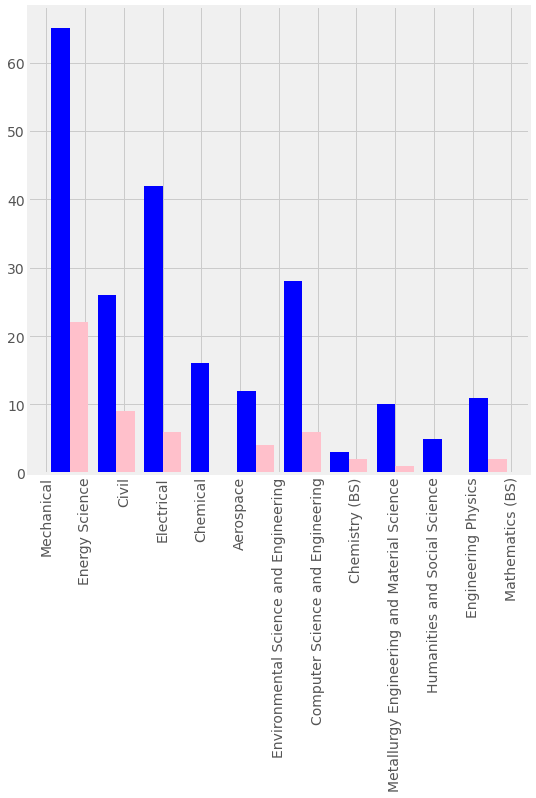

Gender wise distribution in departments for the data collected.

Gender  Are you currently pursuing a minor under any of the following departments/programs?
Female  Centre for Machine Intelligence and Data Science                                        5
        Computer Science and Engineering                                                        7
        Desai Sethi Entrepreneurship School                                                     1
        Humanities and Social Sciences                                                          1
        IDC                                                                                     2
        IEOR                                                                                    1
        Mathematics                                                                             1
        None                                                                                   32
        School of Biosciences and Bioengineering           

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


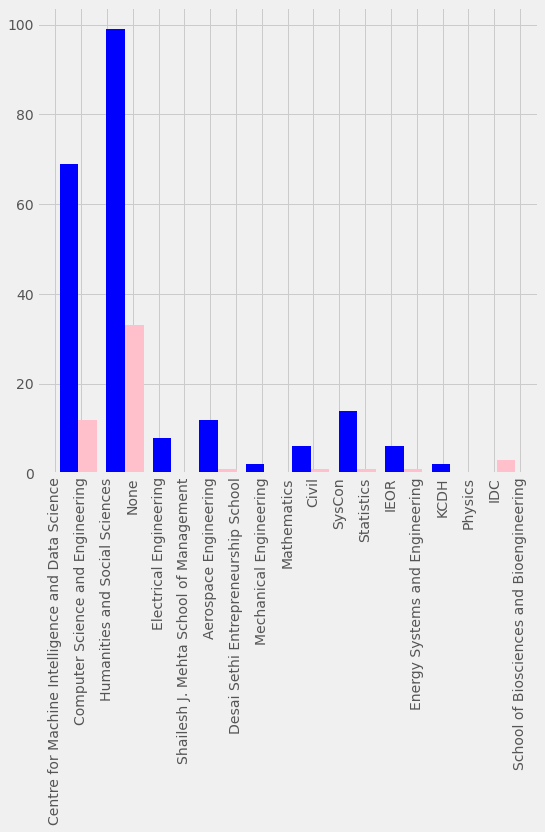

Gender wise distribution of minor selection of people participating in the survey.


In [116]:
### Groupings:
# Gender + Department
grouping1 = cleaned_df.groupby(['Gender', 'What is you department?']).size()
print(grouping1)                                                                # This prints the Gender and Department grouped data

plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
plt.hist([cleaned_df[male].iloc[:, 1], cleaned_df[female].iloc[:, 1]], color=['blue','pink'])
plt.xticks(rotation = 90)
plt.show()
print("Gender wise distribution in departments for the data collected.\n")

# Gender + Minor
grouping2 = cleaned_df.groupby(['Gender', 'Are you currently pursuing a minor under any of the following departments/programs?']).size()
print(grouping2)                                                                # This prints the Gender and Minor allocated grouped data

plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
plt.hist([cleaned_df[male].iloc[:, 2], cleaned_df[female].iloc[:, 2]], color=['blue','pink'])
plt.xticks(rotation = 90)
plt.show()
print("Gender wise distribution of minor selection of people participating in the survey.")

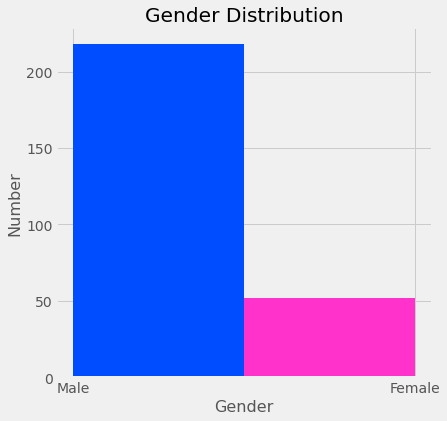

Gender Distribution of data.



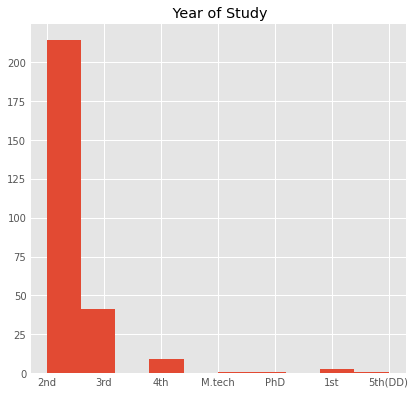

Year-wise Statistic.



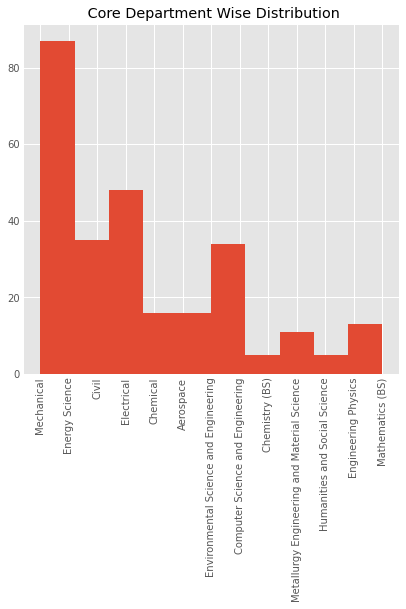

Department-wise distribution.



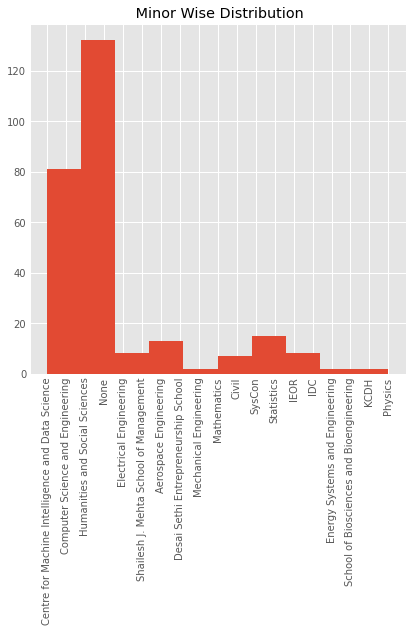

Which minor people are persuing.



In [117]:
#Plotting data Histograms.
plt.figure(figsize=(6,6))
N, bins, patches = plt.hist(cleaned_df['Gender'], 2)
cmap = plt.get_cmap('jet')                                                      #importing a colour scheme(see refernce[2])
blue =cmap(0.2)                                                                   
cmap = plt.get_cmap('spring')                                                   #importing another colour scheme(see reference[2])
pink = cmap(0.2)                                                                #Setting the shade in the scheme.
patches[0].set_facecolor(blue)
patches[1].set_facecolor(pink)
plt.xlabel("Gender", fontsize=16)  
plt.ylabel("Number", fontsize=16)
plt.title('Gender Distribution')
plt.show()
print("Gender Distribution of data.\n")

plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.hist(cleaned_df['Year of study'])
plt.title(' Year of Study')
plt.show()
print("Year-wise Statistic.\n")

plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.hist(cleaned_df['What is you department?'])
plt.xticks(rotation = 90)
plt.title(' Core Department Wise Distribution')
plt.show()
print("Department-wise distribution.\n")

plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.hist(cleaned_df['Are you currently pursuing a minor under any of the following departments/programs?'])
plt.xticks(rotation = 90)
plt.title(' Minor Wise Distribution')
plt.show()
print("Which minor people are persuing.\n")

### SOME INSIGHTS ON THE DATA:
#  Approximate boy to girl ratio is 4.19 to 1.(Data was well spread in this aspect.)
#  About 78% of the students responding from the survey are sophomores.(The data is a little biased in this sense because of the year of study of the project team members.)
#  Most of the students participating in the survey belong to the mechanical department followed by electrical department.(Due to the core branch of the project members.)
#  About 46% percent of the students participating in the survey have not persued any minor.

## Some statistic measures:

In [118]:
#Creating a score of avg. happiness for students divided by genders.
avg_score_male = cleaned_df[male].iloc[:, 18].sum()/cleaned_df[male].shape[0]
avg_score_female = cleaned_df[female].iloc[:, 18].sum()/cleaned_df[female].shape[0]

squared_sum = 0
for i in cleaned_df[male].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[male].shape[0]
var_male = squared_avg - avg_score_male**2

squared_sum = 0
for i in cleaned_df[female].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[female].shape[0]
var_female = squared_avg - avg_score_female**2

print("Avg. Male happiness/expectation score: ", avg_score_male)
print("Avg. Female happiness/expectation score: ", avg_score_female)
print("Avg. Male variance in score: ", var_male)
print("Avg. Female variance in score: ", var_female, "\n")

### INFERENCE: The expected value of score without any data is the mean 2.50, however the happiness return in the institute is more than the average.
#   However the standard deviation is in the range 1.3 to 1.5 which is quite high.
#   Possible reason for this could be the people are more inclined to fill the extreme options for any scale in the survey.
#   To analyze this let us plot histograms and see.

Avg. Male happiness/expectation score:  2.908256880733945
Avg. Female happiness/expectation score:  2.9423076923076925
Avg. Male variance in score:  1.3585556771315535
Avg. Female variance in score:  1.4774408284023668 



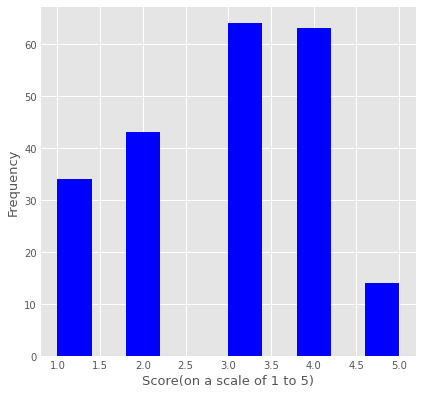

Histogram of how male students feel about the returns they are getting from the institute life compared to what they expected.



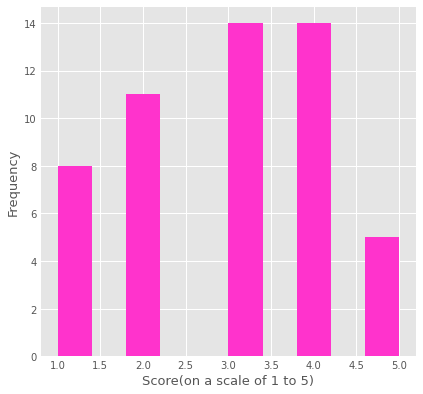

Histogram of how female students feel about the returns they are getting from the institute life compared to what they expected.



In [119]:
plt.figure(figsize=(6,6))
plt.style.use('ggplot')
plt.hist(cleaned_df[male].iloc[:, 18], color ='blue')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Histogram of how male students feel about the returns they are getting from the institute life compared to what they expected.\n')

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
plt.hist(cleaned_df[female].iloc[:, 18], color = pink)
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Histogram of how female students feel about the returns they are getting from the institute life compared to what they expected.\n')

# The above graphs indicate quite the opposite of our inference made earlier. The mode is 3.0. Thus we try to conclude that even thou the variance is a high percent of
# the mean, the distribution is quite symterically distributed.

In [120]:
#Creating department-wise scores and analyzing them.
mechanical = (cleaned_df['What is you department?'] == 'Mechanical')
electrical = (cleaned_df['What is you department?'] == 'Electrical')
civil = (cleaned_df['What is you department?'] == 'Civil')
other_dept = (cleaned_df['What is you department?'] != 'Mechanical')&(cleaned_df['What is you department?'] != 'Electrical')&(cleaned_df['What is you department?'] != 'Civil')

#Making the Scores:
avg_score_mech = cleaned_df[mechanical].iloc[:, 18].sum()/cleaned_df[mechanical].shape[0]
avg_score_elec = cleaned_df[electrical].iloc[:, 18].sum()/cleaned_df[electrical].shape[0]
avg_score_civil = cleaned_df[civil].iloc[:, 18].sum()/cleaned_df[civil].shape[0]
avg_score_other = cleaned_df[other_dept].iloc[:, 18].sum()/cleaned_df[other_dept].shape[0]

squared_sum = 0
for i in cleaned_df[mechanical].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[mechanical].shape[0]
var_mech = squared_avg - avg_score_mech**2

squared_sum = 0
for i in cleaned_df[electrical].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[electrical].shape[0]
var_elec = squared_avg - avg_score_elec**2

squared_sum = 0
for i in cleaned_df[civil].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[civil].shape[0]
var_civil = squared_avg - avg_score_elec**2

squared_sum = 0
for i in cleaned_df[other_dept].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[other_dept].shape[0]
var_other = squared_avg - avg_score_other**2

print('Mechanical Department:\n')
print('Avg. Score: ', avg_score_mech)
print('Variance in Score: ', var_mech, '\n')

print('Electrical Department:\n')
print('Avg. Score: ', avg_score_elec)
print('Variance in Score: ', var_elec, '\n')

print('Civil Department:\n')
print('Avg. Score: ', avg_score_civil)
print('Variance in Score: ', var_civil, '\n')

print('Other Department:\n')
print('Avg. Score: ', avg_score_other)
print('Variance in Score: ', var_other, '\n')

### INFERENCE: The avg. returns to expectation score is very higher in the electrical department compared to mechanical and civil department.
#   The variance in the score for electrical department is very low.
#   We expect electrical department entries to be more towards number higher than 3 and more entries of other department to be closer to 2-3.


Mechanical Department:

Avg. Score:  2.973684210526316
Variance in Score:  1.2887811634349031 

Electrical Department:

Avg. Score:  3.2916666666666665
Variance in Score:  0.9982638888888911 

Civil Department:

Avg. Score:  2.8857142857142857
Variance in Score:  -1.2636408730158717 

Other Department:

Avg. Score:  2.720720720720721
Variance in Score:  1.552633714795876 



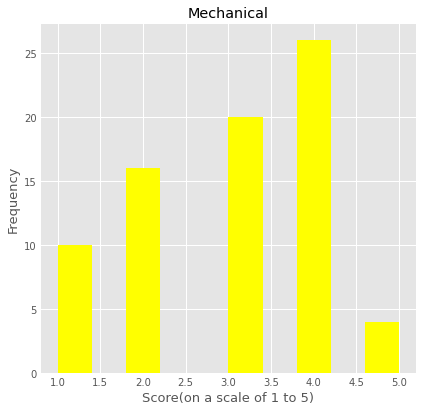

Histogram of how students from the mechanical feel about the returns they are getting from the institute life compared to what they expected.



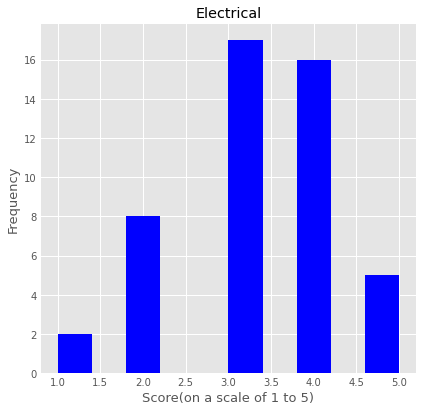

Histogram of how students from the electrical feel about the returns they are getting from the institute life compared to what they expected.



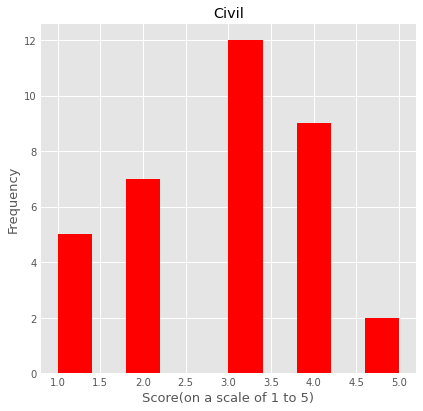

Histogram of how students from the civil department feel about the returns they are getting from the institute life compared to what they expected.



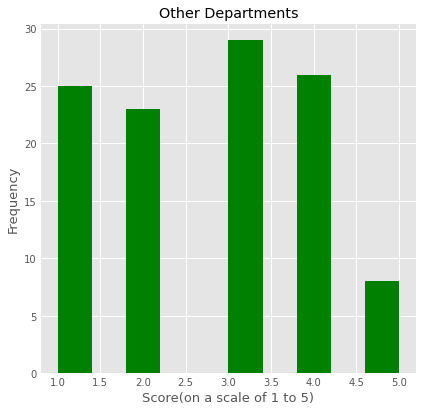

Histogram of how students from other departments feel about the returns they are getting from the institute life compared to what they expected.



In [121]:
### Ploting histograms:
plt.figure(figsize=(6,6))
plt.style.use('ggplot')
plt.hist(cleaned_df[mechanical].iloc[:, 18], color ='yellow')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('Mechanical')
plt.show()
print('Histogram of how students from the mechanical feel about the returns they are getting from the institute life compared to what they expected.\n')

plt.figure(figsize=(6,6))
plt.hist(cleaned_df[electrical].iloc[:, 18], color ='blue')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('Electrical')
plt.show()
print('Histogram of how students from the electrical feel about the returns they are getting from the institute life compared to what they expected.\n')

plt.figure(figsize=(6,6))
plt.hist(cleaned_df[civil].iloc[:, 18], color ='red')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('Civil')
plt.show()
print('Histogram of how students from the civil department feel about the returns they are getting from the institute life compared to what they expected.\n')

plt.figure(figsize=(6,6))
plt.hist(cleaned_df[other_dept].iloc[:, 18], color ='green')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('Other Departments')
plt.show()
print('Histogram of how students from other departments feel about the returns they are getting from the institute life compared to what they expected.\n')

### Looking at the graphs we observe the mode of the mechanical dept. to be 4 however with a good distribution towards 1 and 2 also.
### Electrical department has a large number of entries in the 3-4 range.

In [122]:
### Let us perform analysis on different minors students participating in the survey have started persuing.

#Making the datasets.
cleaned_df.rename(columns = {'''Are you currently pursuing a minor under any of the following departments/programs?''' : 'Minor'}, inplace = True)

no_m = (cleaned_df['Minor'] == 'None')
DS_m = (cleaned_df['Minor'] == 'Centre for Machine Intelligence and Data Science')
CSE_m = (cleaned_df['Minor'] == 'Computer Science and Engineering')
other_m = (cleaned_df['Minor'] != 'Centre for Machine Intelligence and Data Science')&(cleaned_df['Minor'] != 'Computer Science and Engineering')&(cleaned_df['Minor'] != 'None')

avg_score_no_m = cleaned_df[no_m].iloc[:, 18].sum()/cleaned_df[no_m].shape[0]
avg_score_DS_m = cleaned_df[DS_m].iloc[:, 18].sum()/cleaned_df[DS_m].shape[0]
avg_score_CSE_m = cleaned_df[CSE_m].iloc[:, 18].sum()/cleaned_df[CSE_m].shape[0]
avg_score_other_m = cleaned_df[other_m].iloc[:, 18].sum()/cleaned_df[other_m].shape[0]

squared_sum = 0
for i in cleaned_df[no_m].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[no_m].shape[0]
var_no_m = squared_avg - avg_score_no_m**2

squared_sum = 0
for i in cleaned_df[DS_m].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[DS_m].shape[0]
var_DS_m = squared_avg - avg_score_DS_m**2

squared_sum = 0
for i in cleaned_df[CSE_m].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[CSE_m].shape[0]
var_CSE_m = squared_avg - avg_score_CSE_m**2

squared_sum = 0
for i in cleaned_df[other_m].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[other_m].shape[0]
var_other_m = squared_avg - avg_score_other_m**2

print('No minor:\n')
print('Avg. Score: ', avg_score_no_m)
print('Variance in Score: ', var_no_m, '\n')

print('CMInDS Minor:\n')
print('Avg. Score: ', avg_score_DS_m)
print('Variance in Score: ', var_DS_m, '\n')

print('CSE Minor:\n')
print('Avg. Score: ', avg_score_CSE_m)
print('Variance in Score: ', var_CSE_m, '\n')

print('Other Department Minor:\n')
print('Avg. Score: ', avg_score_other_m)
print('Variance in Score: ', var_other_m, '\n')

### INFERENCES: We se that people not participating in any minors have a lower returns to expectation score. This is because they have not explored the diverse acedemia IIT Bombay
#   has got to offer.
#   People with a CSE Minor seem to be satisfied till a great extent although there is a good deal of variance.
#   Let us verify these claims with histograms.


No minor:

Avg. Score:  2.7890625
Variance in Score:  1.30706787109375 

CMInDS Minor:

Avg. Score:  3.0638297872340425
Variance in Score:  1.4640108646446368 

CSE Minor:

Avg. Score:  3.323529411764706
Variance in Score:  1.3365051903114171 

Other Department Minor:

Avg. Score:  2.8360655737704916
Variance in Score:  1.3501746842246725 



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


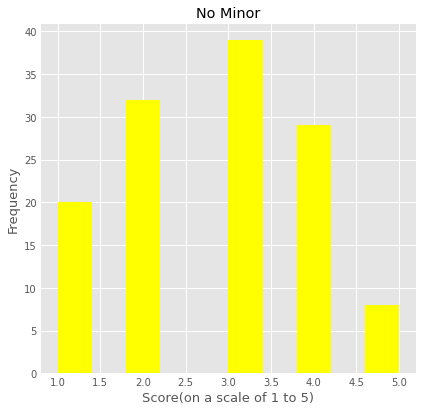

Histogram of how students persuing no minor feel about the returns they are getting from the institute life compared to what they expected.



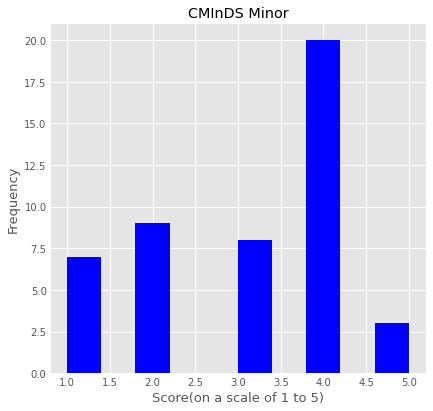

Histogram of how students persuing a CMInDS minor feel about the returns they are getting from the institute life compared to what they expected.



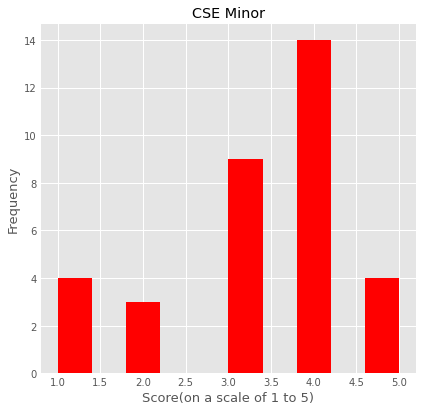

Histogram of how students persuing a CSE minor feel about the returns they are getting from the institute life compared to what they expected.



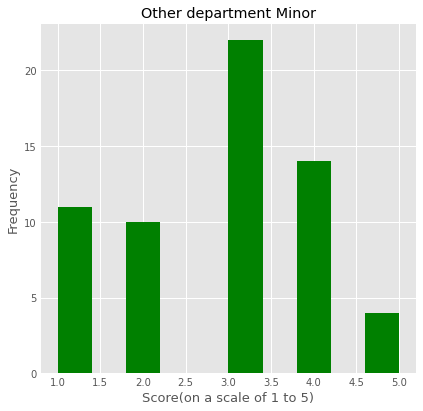

Histogram of how students persuing other minors feel about the returns they are getting from the institute life compared to what they expected.



In [123]:
### Ploting histograms:
plt.figure(figsize=(6,6))
plt.style.use('ggplot')
plt.hist(cleaned_df[no_m].iloc[:, 18], color ='yellow')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('No Minor')
plt.show()
print('Histogram of how students persuing no minor feel about the returns they are getting from the institute life compared to what they expected.\n')

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
plt.hist(cleaned_df[DS_m].iloc[:, 18], color ='blue')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('CMInDS Minor')
plt.show()
print('Histogram of how students persuing a CMInDS minor feel about the returns they are getting from the institute life compared to what they expected.\n')

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
plt.hist(cleaned_df[CSE_m].iloc[:, 18], color ='red')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('CSE Minor')
plt.show()
print('Histogram of how students persuing a CSE minor feel about the returns they are getting from the institute life compared to what they expected.\n')

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
plt.hist(cleaned_df[other_m].iloc[:, 18], color ='green')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('Other department Minor')
plt.show()
print('Histogram of how students persuing other minors feel about the returns they are getting from the institute life compared to what they expected.\n')

### We oberserve most data to be near the 3 score mark in almost all minor departments. This is captured by the almost similar variance of all 4 fields. 

## Cleaning the CPI

In [124]:
cleanest_df = cleaner_df

In [125]:
cleanest_df.rename(columns = {'''CPI (write in the text box) \nDisclaimer: This is an anonymous survey, we don't judge.''' : 'CPI'}, inplace = True)

In [126]:
print(cleanest_df['CPI'])

0                      8.7
1                     9.08
2                     8.68
3                     9.02
4                     8.65
              ...         
265                    9.6
266                    NaN
267                   8.94
268                   9.02
269    10 (guess who I am)
Name: CPI, Length: 270, dtype: object


In [127]:
s = cleanest_df['CPI'].isna().sum()
print(s)

52


In [128]:
cleanest_df['CPI'].replace(numpy.nan, 0, inplace = True)

In [129]:
cleanest_df['CPI extracted'] = cleanest_df.CPI.str.extract('([-+]?\d*\.?\d+)')

In [130]:
del cleanest_df['index']
display(cleanest_df)
#cleanest_df.dtypes                                                               #debugging

,Year of study,What is you department?,Are you currently pursuing a minor under any of the following departments/programs?,Gender,What song are you vibing to these days?,Relationship Status,Township,How frequently do you eat out?,How often do you feel homesick?,Do you get along with your roommate?,...,How much are you affected by quizzes and assignments ?,CPI,How is your social life?,How many hours do you sleep daily?,How well are you coping up with the offline semester?,Do you feel you are missing out?,Do you think your fluency in English affects your confidence?,How does your Insti life compare to your expectations? Take your time,Any feedback regarding the survey? How could we have done better?,CPI extracted
0,2nd,Mechanical,Centre for Machine Intelligence and Data Science,Male,NaN,In pursuit,City,Occasionally (once in a week),Sometimes,I feel comfortable with them,...,3,8.7,I like to keep my social circle small,7,I am facing difficulty with time management,"Scholastically, Socially, Extra Curriculars (C...",No,2,NaN,8.7
1,2nd,Mechanical,Centre for Machine Intelligence and Data Science,Male,the world could end with you,Single,City,Occasionally (once in a week),Never,There is minor miscommunication,...,4,9.08,I like to keep my social circle small,5,I am facing difficulty with time management,"Scholastically, Socially",No,4,NaN,9.08
2,2nd,Mechanical,Computer Science and Engineering,Female,Taylor Swift and Hindi,In pursuit,City,Often (more than five times a week),Only during difficult times,There is minor miscommunication,...,4,8.68,To a point where I feel guilty of inefficient ...,5,I am facing difficulty with time management,"Scholastically, Socially",No,3,NaN,8.68
3,2nd,Mechanical,Centre for Machine Intelligence and Data Science,Male,NaN,Single,City,Occasionally (once in a week),Sometimes,I feel comfortable with them,...,4,9.02,I like to keep my social circle small,7,I am facing difficulty with time management,Extra Curriculars (Cult activities and college...,No,4,NaN,9.02
4,2nd,Mechanical,Computer Science and Engineering,Male,NaN,Single,City,Occasionally (once in a week),Sometimes,I feel comfortable with them,...,3,8.65,I like to keep my social circle small,6,I am facing difficulty with time management,"Scholastically, Technical activities (Tech tea...",Yes,4,NaN,8.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3rd,Computer Science and Engineering,None,Male,Sunroof,Single,City,Occasionally (once in a week),Only during difficult times,I feel comfortable with them,...,3,9.6,I like to keep my social circle small,7,Its just perfect,"Socially, Extra Curriculars (Cult activities a...",Yes,3,NaN,9.6
266,2nd,Civil,None,Female,comfortably numb-pink floyd,Single,City,Occasionally (once in a week),Always,There is minor miscommunication,...,3,0,I like to keep my social circle small,6,I am facing difficulty with time management,"Scholastically, Socially, Extra Curriculars (C...",No,3,"more options for each question could be given,...",NaN
267,3rd,Mechanical,Centre for Machine Intelligence and Data Science,Male,Until i found yoj,Committed,City,Often (more than five times a week),Never,I feel comfortable with them,...,3,8.94,I like to keep my social circle small,7,I am facing difficulty with time management,Scholastically,Yes,4,NaN,8.94
268,4th,Chemical,Centre for Machine Intelligence and Data Science,Male,Afreen Afreen,In pursuit,Town,Occasionally (once in a week),Sometimes,I live in single occupancy,...,2,9.02,I like to keep my social circle small,8,I am facing difficulty with time management,Socially,Yes,4,NaN,9.02


In [131]:
cleanest_df['CPI extracted'] = pd.to_numeric(cleanest_df['CPI extracted'])

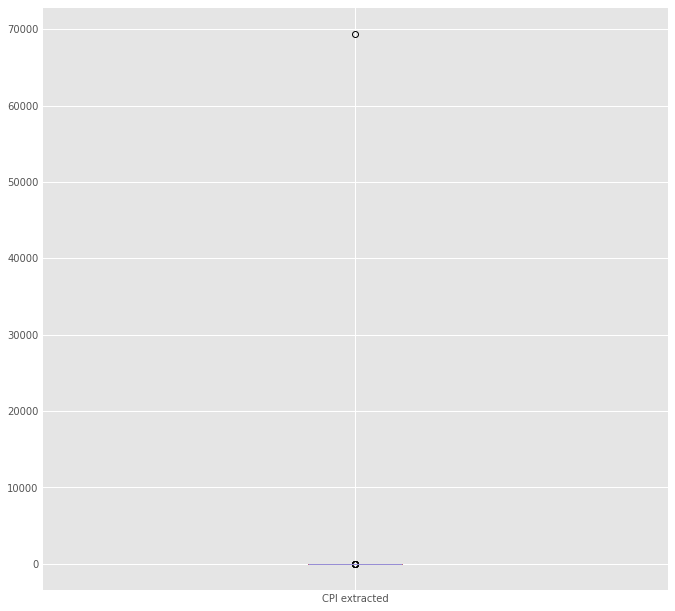

In [132]:
### Let us analysis thecleaned cpi columns using box and whiskers plot.

cleanest_df['CPI extracted'].plot.box(figsize=(10, 10))
### OBSERVATION:
#   We observed a large outlier value in the graph below.
#   The reason was on of the entries was a 5 digit value which was to be cleaned.

Text(0.5, 1.0, 'CPI of student participating in the survey.')

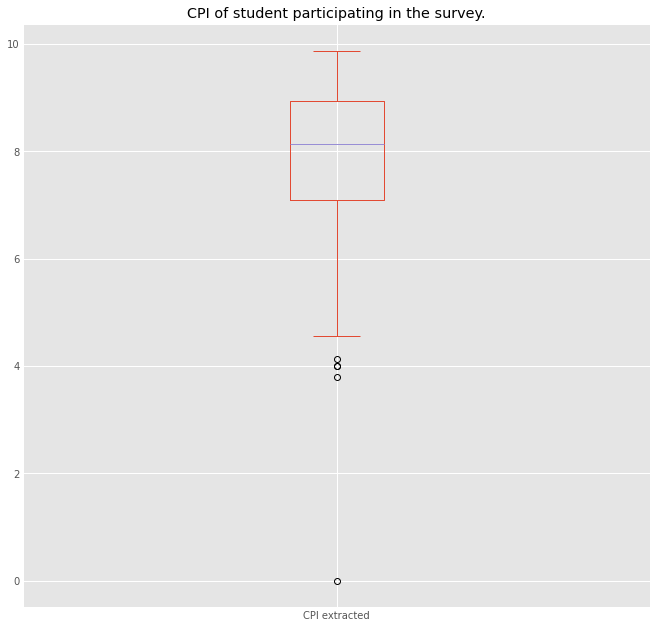

In [133]:
#cleaning the values.
cleanest_df[cleanest_df['CPI extracted'] >= 10] = numpy.nan   

cleanest_df['CPI extracted'].plot.box(figsize=(10, 10))
plt.title('CPI of student participating in the survey.')  

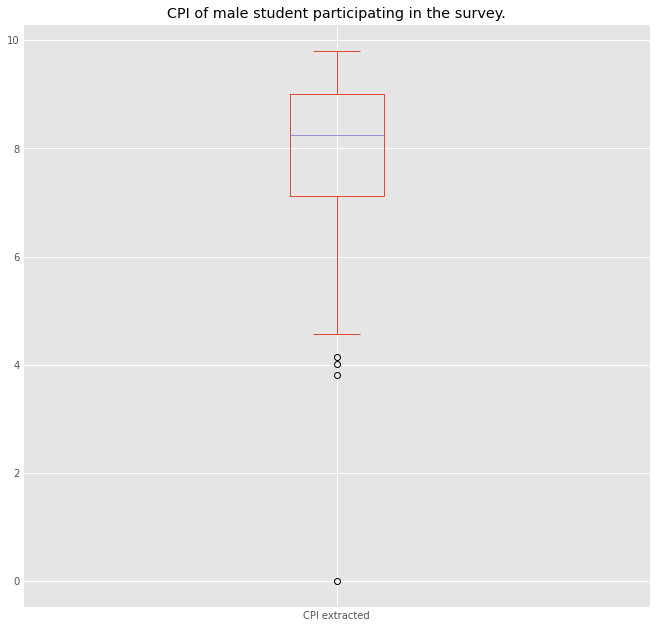

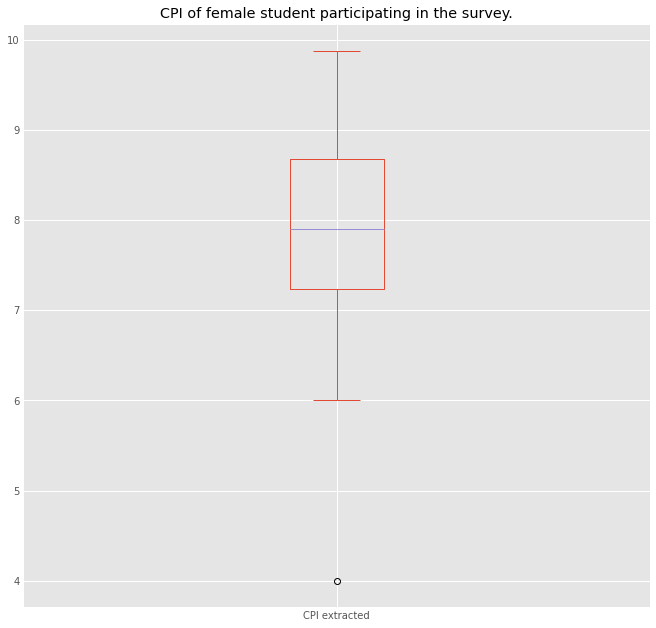

In [134]:
### Let us plot this separately for boys and girls.
# Making the datasets
male_c = (cleanest_df['Gender'] == 'Male')
female_c = (cleanest_df['Gender'] == 'Female')

male_clean = cleanest_df[male_c]
female_clean = cleanest_df[female_c]

male_clean['CPI extracted'].plot.box(figsize=(10, 10))
plt.title('CPI of male student participating in the survey.')
plt.show() 

female_clean['CPI extracted'].plot.box(figsize=(10, 10))
plt.title('CPI of female student participating in the survey.') 
plt.show()

### OBSERVATION:
# We observe the minor difference between the avg. CPI of male and females in the institute with the help of the plot shown below.

## Relationship status

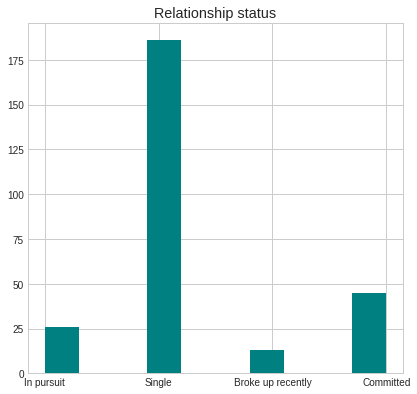

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


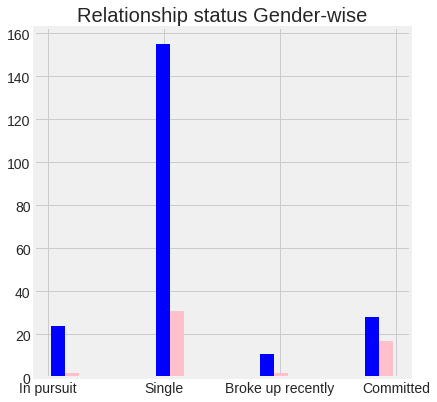

Metrics for Singles:
Avg. score for singles:  2.903225806451613
Variance in score for singles:  1.3132154006243493 

Metrics for Committed Females:
Avg. score for committed Females:  3.0
Variance in score for committed Females:  1.882352941176471 

Metrics for Committed Males:
Avg. score for Committed Males:  3.0714285714285716
Variance in score for Committed Males:  2.428422773896239 



In [135]:
plt.figure(figsize=(6,6))
plt.style.use('seaborn-whitegrid')
plt.hist(cleaned_df['Relationship Status'], color = 'teal')
plt.title('Relationship status')
plt.show()
print('\n')
###Let us analyze this data gender-wise to gauge more insight.
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')
plt.hist([cleaned_df[male].iloc[:, 5], cleaned_df[female].iloc[:, 5]], color=['blue','pink'])
plt.title('Relationship status Gender-wise')
plt.show()

### OBSERVATIONS : People in commited status happen to have almost equal gender distribution. This indicates towards the fact that many students are commited to each other within
#   the campus. This could be a possible inferemce.
#   There is a large deal of single male students in the campus.
#   Let us analyze their avg. happiness score(return to expectation score).

# Creating a few Datasets:
singles = (cleaned_df['Relationship Status'] == 'Single')
females = cleaned_df[female]
males = cleaned_df[male]

committed_females = (females['Relationship Status'] == 'Committed')
committed_males = (males['Relationship Status'] == 'Committed')

# Metric analysis:
avg_score_single = cleaned_df[singles].iloc[:, 18].sum()/cleaned_df[singles].shape[0]

squared_sum = 0
for i in cleaned_df[singles].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[singles].shape[0]
var_single = squared_avg - avg_score_single**2

avg_score_committed_females = females[committed_females].iloc[:, 18].sum()/females[committed_females].shape[0]

squared_sum = 0
for i in females[committed_females].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/females[committed_females].shape[0]
var_committed_females = squared_avg - avg_score_committed_females**2

avg_score_committed_males = males[committed_males].iloc[:, 18].sum()/males[committed_males].shape[0]

squared_sum = 0
for i in males[committed_males].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/males[committed_males].shape[0]
var_committed_males = squared_avg - avg_score_single**2

### Printing the metrics:
print('Metrics for Singles:')
print('Avg. score for singles: ', avg_score_single)
print('Variance in score for singles: ', var_single, '\n')

print('Metrics for Committed Females:')
print('Avg. score for committed Females: ', avg_score_committed_females)
print('Variance in score for committed Females: ', var_committed_females, '\n')

print('Metrics for Committed Males:')
print('Avg. score for Committed Males: ', avg_score_committed_males)
print('Variance in score for Committed Males: ', var_committed_males, '\n')

### INFERENCE: From the scores it is visible that there is a small gap of between the avg. scores of committed and single students. 
#   However there is a huge variance in the opnion of committed males.


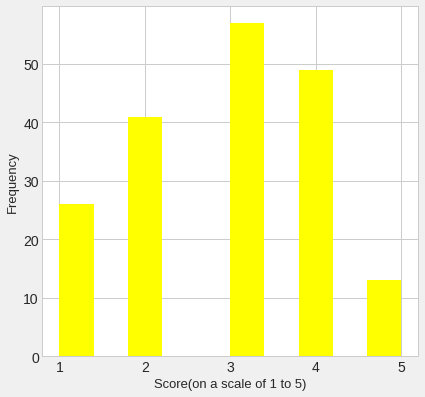

Histogram of how single students feel about the returns they are getting from the institute life compared to what they expected.



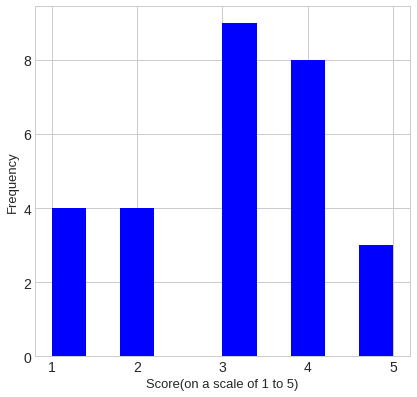

Histogram of how committed males feel about the returns they are getting from the institute life compared to what they expected.



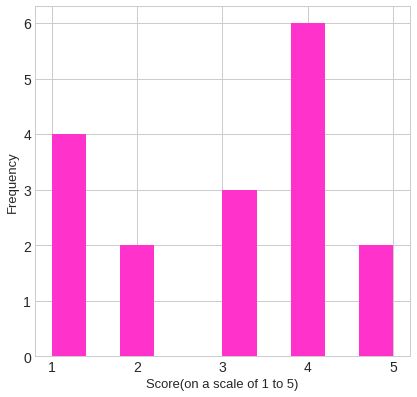

Histogram of how scommitted females feel about the returns they are getting from the institute life compared to what they expected.



In [136]:
### Ploting histograms:
plt.figure(figsize=(6,6))
plt.style.use('seaborn-whitegrid')
plt.hist(cleaned_df[singles].iloc[:, 18], color ='yellow')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Histogram of how single students feel about the returns they are getting from the institute life compared to what they expected.\n')

plt.figure(figsize=(6,6))
plt.style.use('seaborn-whitegrid')
plt.hist(males[committed_males].iloc[:, 18], color ='blue')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Histogram of how committed males feel about the returns they are getting from the institute life compared to what they expected.\n')

plt.figure(figsize=(6,6))
plt.style.use('seaborn-whitegrid')
plt.hist(females[committed_females].iloc[:, 18], color = pink)
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Histogram of how scommitted females feel about the returns they are getting from the institute life compared to what they expected.\n')

### OBSERVATIONS ON HISTOGRAMS:
#   The mode of committed females is 4 while that of committed males is 3. Also looking at the distribution we can infer that females are valuing relationship to a greater extent.
#   The Single distribution is properly centred at the peak.

## Township 

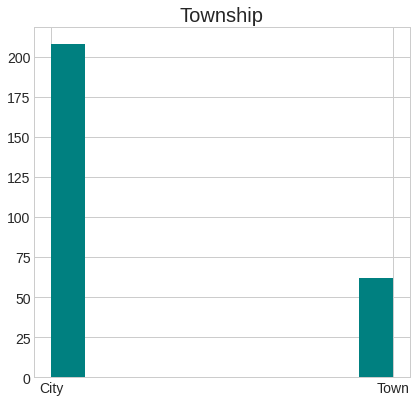

Basic Township division of students participating in the survey.



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


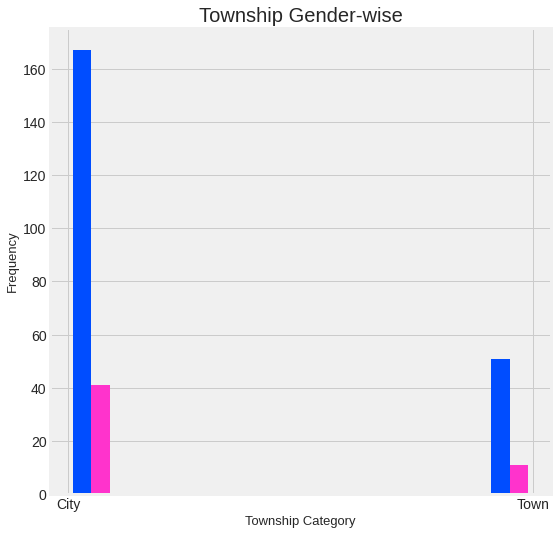

Township Gender-wise distribution

Metrics for Male Students belonging to cities:
Avg. score :  2.9760479041916166
Variance in score :  1.3886478539926141 

Metrics for Female Students belonging to cities:
Avg. score :  3.097560975609756
Variance in score :  1.4051160023795362 

Metrics for Male Students belonging to Town:
Avg. score :  2.6862745098039214
Variance in score :  1.1956939638600552 

Metrics for Female Students belonging to Town:
Avg. score :  2.3636363636363638
Variance in score :  1.322314049586776 



In [137]:
plt.figure(figsize=(6,6))
plt.style.use('seaborn-whitegrid')
plt.hist(cleaned_df['Township'], color = 'teal')
plt.title('Township')
plt.show()
print('Basic Township division of students participating in the survey.\n')

## Let us analyze the township genderwise.
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
plt.hist([cleaned_df[male].iloc[:, 6], cleaned_df[female].iloc[:, 6]], color=[blue, pink])
plt.title('Township Gender-wise')
plt.xlabel("Township Category", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Township Gender-wise distribution\n')

# Firstly we would like to address the challenges with this very data bifurcation,
# Many people considered their township towards a city to be a part of certain social groups and avoid inferiority.
# There exists no distinct boundary between a small city and a town. Even if there exist one it is not common knowledge.

#Making a few more datasets.
m_city = (males['Township'] == 'City') 
f_city = (females['Township'] == 'City') 
m_town = (males['Township'] == 'Town') 
f_town = (females['Township'] == 'Town') 

# Making returns to expectations ration scores for each of the category.
avg_score_m_city = males[m_city].iloc[:, 18].sum()/males[m_city].shape[0]       # Mean and Variance for City male students.

squared_sum = 0
for i in males[m_city].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/males[m_city].shape[0]
var_m_city = squared_avg - avg_score_m_city**2

avg_score_f_city = females[f_city].iloc[:, 18].sum()/females[f_city].shape[0]   # Mean and Variance for City female students.

squared_sum = 0
for i in females[f_city].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/females[f_city].shape[0]
var_f_city = squared_avg - avg_score_f_city**2

avg_score_m_town = males[m_town].iloc[:, 18].sum()/males[m_town].shape[0]       # Mean and Variance for Town male students.

squared_sum = 0
for i in males[m_town].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/males[m_town].shape[0]
var_m_town = squared_avg - avg_score_m_town**2

avg_score_f_town = females[f_town].iloc[:, 18].sum()/females[f_town].shape[0]   # Mean and Variance for Town female students.

squared_sum = 0
for i in females[f_town].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/females[f_town].shape[0]
var_f_town = squared_avg - avg_score_f_town**2

### Lets us analyze the scores.
print('Metrics for Male Students belonging to cities:')
print('Avg. score : ', avg_score_m_city)
print('Variance in score : ', var_m_city, '\n')

print('Metrics for Female Students belonging to cities:')
print('Avg. score : ', avg_score_f_city)
print('Variance in score : ', var_f_city, '\n')

print('Metrics for Male Students belonging to Town:')
print('Avg. score : ', avg_score_m_town)
print('Variance in score : ', var_m_town, '\n')

print('Metrics for Female Students belonging to Town:')
print('Avg. score : ', avg_score_f_town)
print('Variance in score : ', var_f_town, '\n')

### OBSERVATIONS IN SCORE:
#   City Female students rank among the most satisfied students in the institute.
#   Town Female Students rank among the least satisfied students in the institute.
#   HYPOTHESIS 1: A possible conclusion might be that the town female students might be the least social students due to shyness and getting overwhelmed by the 
#   lifestyle of other female students.(Tested in the next cell)


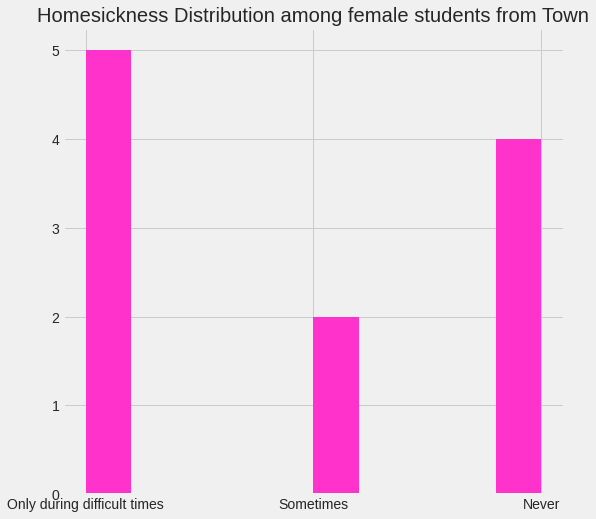

In [138]:
# To analyze HYPOTHESIS 1 let us do the following analysis on homesickness.
# Ploting a histogram of homesickness frequency for female students belonging to towns.

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
plt.hist(females[f_town].iloc[:, 8], color = pink)
plt.title('Homesickness Distribution among female students from Town')
plt.show()

# OBSERVATION:
# We see that most females feel homesick during difficult times, however the frequency of this data is quite small to make any solid conclusion. 
# Also a large chuck of females from this list do not feel homesick.(Atleast their opinion during the survey.) 

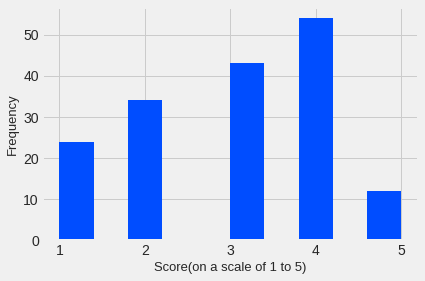

Histogram of how male students belonging to cities feel about the returns they are getting from the institute life compared to what they expected.



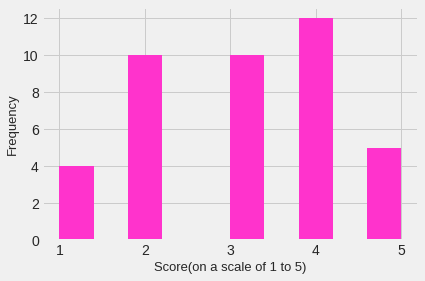

Histogram of how female students belonging to cities feel about the returns they are getting from the institute life compared to what they expected.



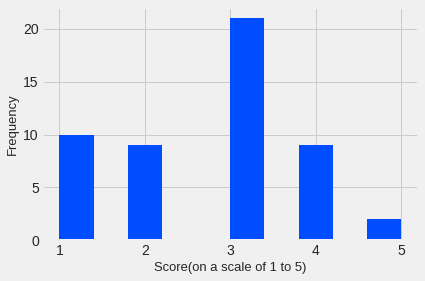

Histogram of how male students belonging to towns feel about the returns they are getting from the institute life compared to what they expected.



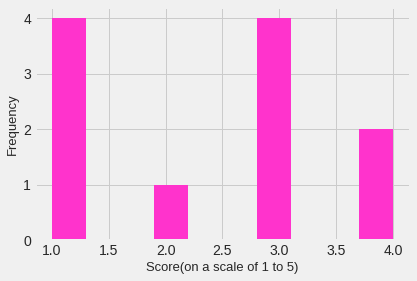

Histogram of how female students belonging to towns feel about the returns they are getting from the institute life compared to what they expected.



In [139]:
### Ploting histograms:
plt.style.use('fivethirtyeight')
plt.hist(males[m_city].iloc[:, 18], color = blue)
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Histogram of how male students belonging to cities feel about the returns they are getting from the institute life compared to what they expected.\n')

plt.style.use('fivethirtyeight')
plt.hist(females[f_city].iloc[:, 18], color = pink)
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Histogram of how female students belonging to cities feel about the returns they are getting from the institute life compared to what they expected.\n')

plt.style.use('fivethirtyeight')
plt.hist(males[m_town].iloc[:, 18], color = blue)
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Histogram of how male students belonging to towns feel about the returns they are getting from the institute life compared to what they expected.\n')

plt.style.use('fivethirtyeight')
plt.hist(females[f_town].iloc[:, 18], color = pink)
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Histogram of how female students belonging to towns feel about the returns they are getting from the institute life compared to what they expected.\n')

### OBSERVATIONS ON HISTOGRAMS:
#   The mode of city based students is 4. This may be due to the fact that they have not experience any major cultural differences in the institute.
#   Many of the female town-based females feel to be unsatisfied by the institute life.

## How often do you feel homesick?

In [140]:
cleaned_df.rename(columns = {'How often do you feel homesick?' : 'Homesickness'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


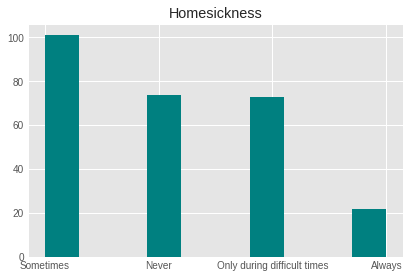

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


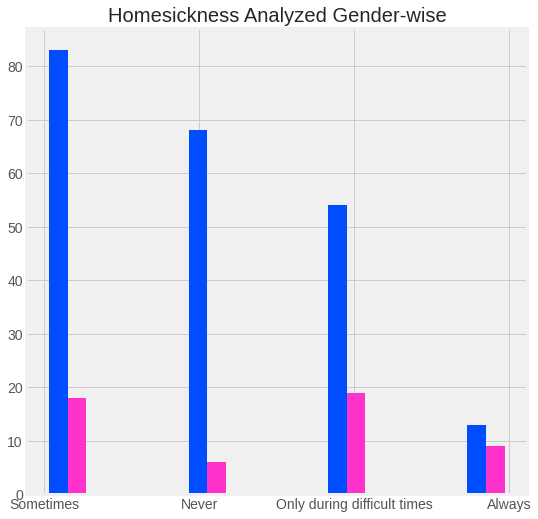

In [141]:
plt.style.use('ggplot')
plt.hist(cleaned_df['Homesickness'], color = 'teal')
plt.title('Homesickness')
plt.show()

### Let us analyze this gender-wise.
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
plt.hist([cleaned_df[male].iloc[:, 8], cleaned_df[female].iloc[:, 8]], color=[blue, pink])
plt.title('Homesickness Analyzed Gender-wise')
plt.show()

### OBSERVATION:
#   We roughly observe a 4:1 ratio of male to female in almost all categories. Thus we can conclude here that gender doesn't have a play in homesickness.

In [142]:
# Now let us bifurcate these datasets.
some_h = (cleaned_df['Homesickness'] == 'Sometimes')
never_h = (cleaned_df['Homesickness'] == 'Never')
diff_h = (cleaned_df['Homesickness'] == 'Only during difficult times')
all_h = (cleaned_df['Homesickness'] == 'Always')

#Let use make Metrics to this data:
avg_score_some_h = cleaned_df[some_h].iloc[:, 18].sum()/cleaned_df[some_h].shape[0]   # Mean and Variance for students who face some homesickness.

squared_sum = 0
for i in cleaned_df[some_h].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[some_h].shape[0]
var_some_h = squared_avg - avg_score_some_h**2

avg_score_never_h = cleaned_df[never_h].iloc[:, 18].sum()/cleaned_df[never_h].shape[0] # Mean and Variance for students who face no homesickness.

squared_sum = 0
for i in cleaned_df[never_h].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[never_h].shape[0]
var_never_h = squared_avg - avg_score_never_h**2

avg_score_diff_h = cleaned_df[diff_h].iloc[:, 18].sum()/cleaned_df[diff_h].shape[0]    # Mean and Variance for students who face homesickness only during difficult times.

squared_sum = 0
for i in cleaned_df[diff_h].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[diff_h].shape[0]
var_diff_h = squared_avg - avg_score_diff_h**2

avg_score_all_h = cleaned_df[all_h].iloc[:, 18].sum()/cleaned_df[all_h].shape[0]       # Mean and Variance for students who face homesickness all the time.

squared_sum = 0
for i in cleaned_df[all_h].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[all_h].shape[0]
var_all_h = squared_avg - avg_score_all_h**2

In [143]:
#Printing all the metrics:
print('Metrics for Students who feel homesick sometimes:')
print('Avg. score : ', avg_score_some_h)
print('Variance in score : ', var_some_h, '\n')

print('Metrics for Students who never feel homesick:')
print('Avg. score : ', avg_score_never_h)
print('Variance in score : ', var_never_h, '\n')

print('Metrics for Students who feel homesick only during difficult times:')
print('Avg. score : ', avg_score_diff_h)
print('Variance in score : ', var_diff_h, '\n')

print('Metrics for Students who feel homesick all the time:')
print('Avg. score : ', avg_score_all_h)
print('Variance in score : ', var_all_h, '\n')

### OBSERVATIONs:
#   We observe that almost all categories have almost similiar average scores.
#   Although the variance for students who fell homesick all the time is large.

Metrics for Students who feel homesick sometimes:
Avg. score :  2.9702970297029703
Variance in score :  1.1377315949416733 

Metrics for Students who never feel homesick:
Avg. score :  2.9594594594594597
Variance in score :  1.5253834915997064 

Metrics for Students who feel homesick only during difficult times:
Avg. score :  2.8493150684931505
Variance in score :  1.3882529555263652 

Metrics for Students who feel homesick all the time:
Avg. score :  2.727272727272727
Variance in score :  1.9256198347107443 



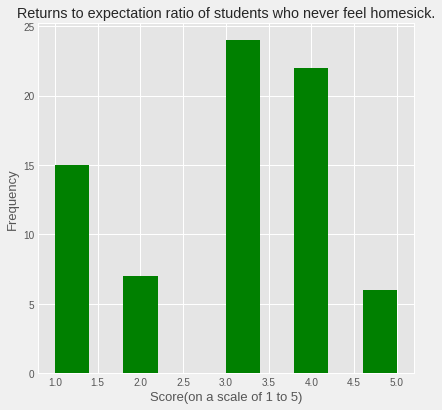

Plot of students who never feel homesick.



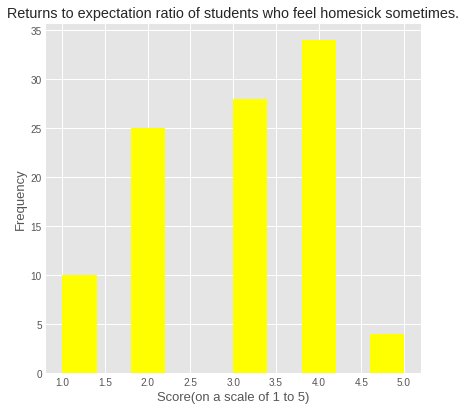

Plot of students who feel homesick sometimes.



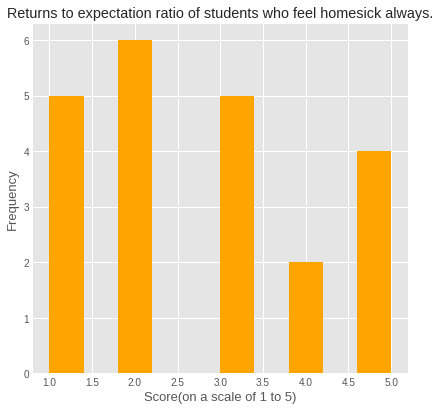

Plot of students who feel homesick all the time.



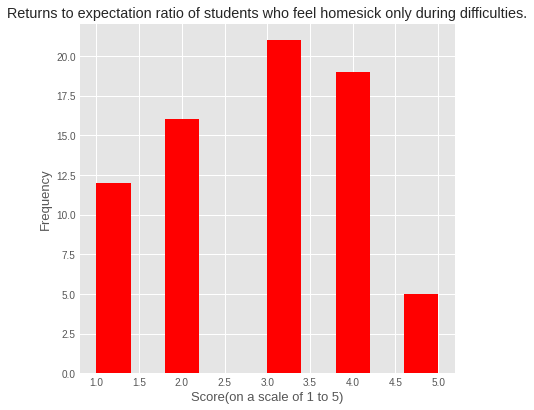

Plot of students who feel homesick only during difficult times.



In [144]:
### Let us try to analyze the metrics using plots.
plt.figure(figsize=(6,6))
plt.style.use('ggplot')
plt.hist(cleaned_df[never_h].iloc[:, 18], color='green')
plt.title('Returns to expectation ratio of students who never feel homesick.')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Plot of students who never feel homesick.\n')

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
plt.hist(cleaned_df[some_h].iloc[:, 18], color='yellow')
plt.title('Returns to expectation ratio of students who feel homesick sometimes.')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Plot of students who feel homesick sometimes.\n')

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
plt.hist(cleaned_df[all_h].iloc[:, 18], color='orange')
plt.title('Returns to expectation ratio of students who feel homesick always.')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Plot of students who feel homesick all the time.\n')

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
plt.hist(cleaned_df[diff_h].iloc[:, 18], color='red')
plt.title('Returns to expectation ratio of students who feel homesick only during difficulties.')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Plot of students who feel homesick only during difficult times.\n')

### OBSERVATION:
#   We see that students who feel a little homesick have a mode happiness/satisfaction index of 4 compared to the ones who do not feel homesick at all who have the mode at 3.
#   People who feel homesick only during difficult times have an almost bell distribution.

## Intern Issues

In [145]:
cleaned_df.rename(columns = {'Are you facing Intern/placement issue?' : 'Intern'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


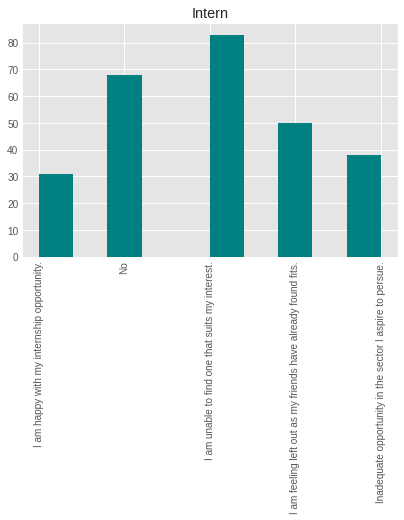

What students think about their intership?




/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


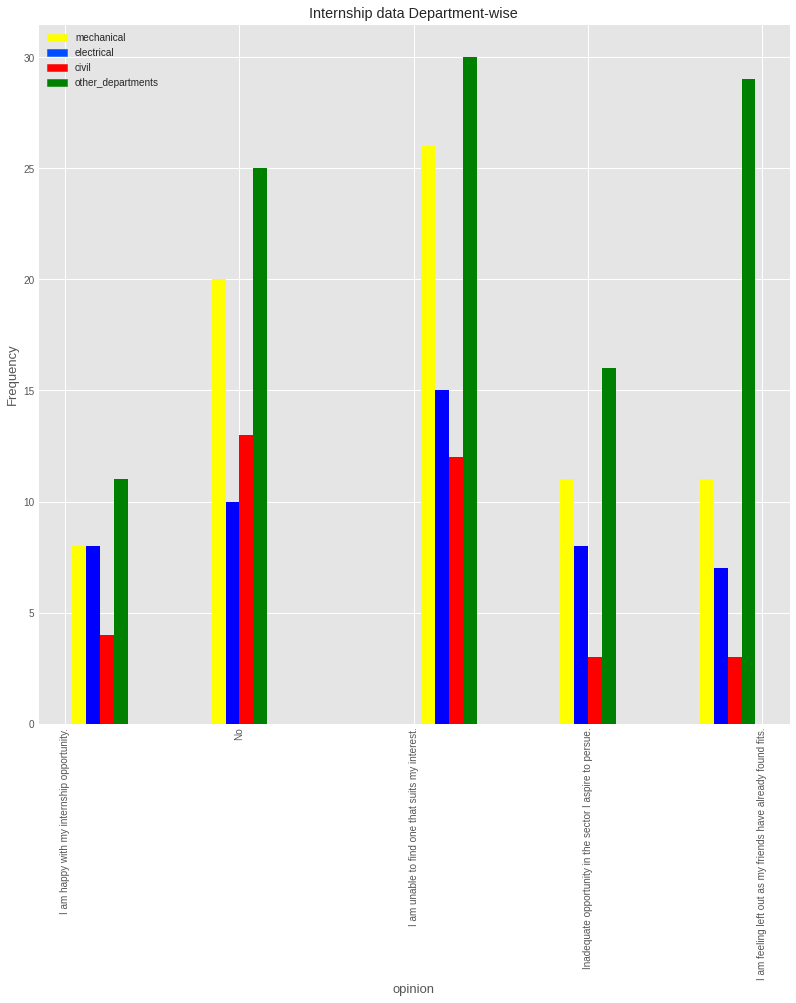

In [146]:
#Plotting a simple histogram of the data.
plt.hist(cleaned_df['Intern'], color = 'teal')
plt.title('Intern')
plt.xticks(rotation = 90)
plt.show()
print('What students think about their intership?\n\n')

#Let us analyze this department-wise.
yellow_patch = mpatches.Patch(color='yellow', label='mechanical')
blue_patch = mpatches.Patch(color=blue, label='electrical')
red_patch = mpatches.Patch(color='red', label='civil')
green_patch = mpatches.Patch(color='green', label='other_departments')

plt.figure(figsize=(12,12))
plt.hist([cleaned_df[mechanical].iloc[:, 10], cleaned_df[electrical].iloc[:, 10], cleaned_df[civil].iloc[:, 10], cleaned_df[other_dept].iloc[:, 10]], color=['yellow','blue','red','green'])
plt.xticks(rotation = 90)
plt.xlabel("opinion", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.legend(handles=[yellow_patch, blue_patch, red_patch, green_patch])
plt.title('Internship data Department-wise')
plt.show()

### OBSERVATION:
#   We know that the composition of people from other departments is primarily of Chemical, Energy Science, Aerospace students.
#   Thus we are able to see a large chuck of these students not able to find an intern of their liking.
#   A large chuck of students have Fear Of Missing Out(FOMO) on this subject. This is also predominant in people of other departments.
#   About 30-40% students are happy with their internship and facing know issues.

## Do you think your fluency in English affects your confidence?

In [147]:
cleaned_df.rename(columns = {'Do you think your fluency in English affects your confidence?' : 'English confidence'}, inplace = True)

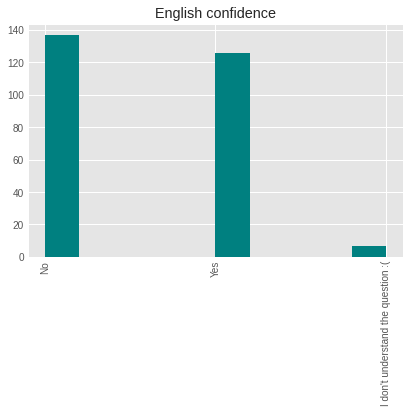

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


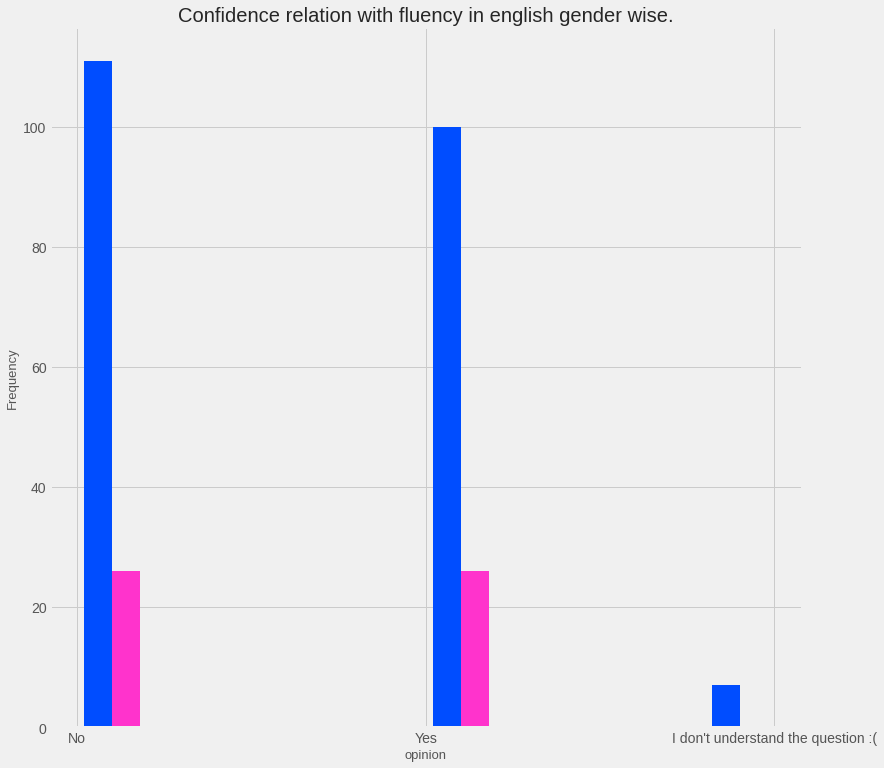

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


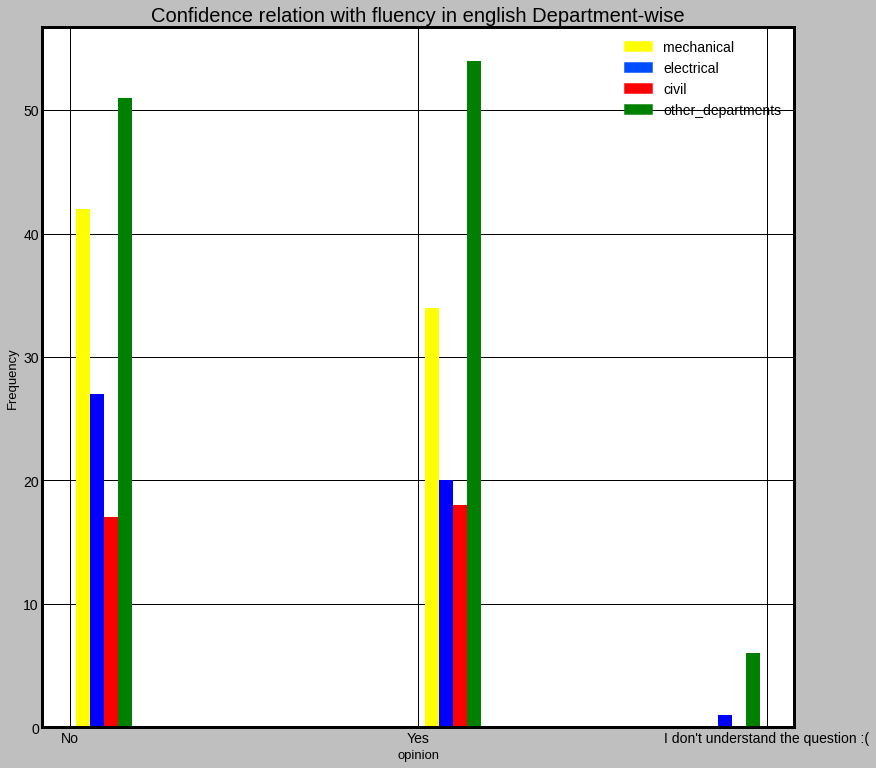

In [148]:
plt.hist(cleaned_df['English confidence'], color = 'teal')
plt.title('English confidence')
plt.xticks(rotation = 90)
plt.show()

#Let us see if this has anything to do with gender.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,12))
plt.hist([cleaned_df[male].iloc[:, 17], cleaned_df[female].iloc[:, 17]], color=[blue, pink])
plt.xlabel("opinion", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('Confidence relation with fluency in english gender wise.')
plt.show()

#Let us see if this has anything to do with department.
yellow_patch = mpatches.Patch(color='yellow', label='mechanical')
blue_patch = mpatches.Patch(color=blue, label='electrical')
red_patch = mpatches.Patch(color='red', label='civil')
green_patch = mpatches.Patch(color='green', label='other_departments')


plt.style.use('grayscale')
plt.figure(figsize=(12,12))
plt.hist([cleaned_df[mechanical].iloc[:, 17], cleaned_df[electrical].iloc[:, 17], cleaned_df[civil].iloc[:, 17], cleaned_df[other_dept].iloc[:, 17]], color=['yellow','blue','red','green'])
plt.xlabel("opinion", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.legend(handles=[yellow_patch, blue_patch, red_patch, green_patch])    
plt.title('Confidence relation with fluency in english Department-wise')
plt.show()

### OBSERVATIONS:
#   The opinion is equally divided among students and also equally divided gender-wise and branchwise.
#   No further analysis can be performed on this.

## Coping up with your Roommate:

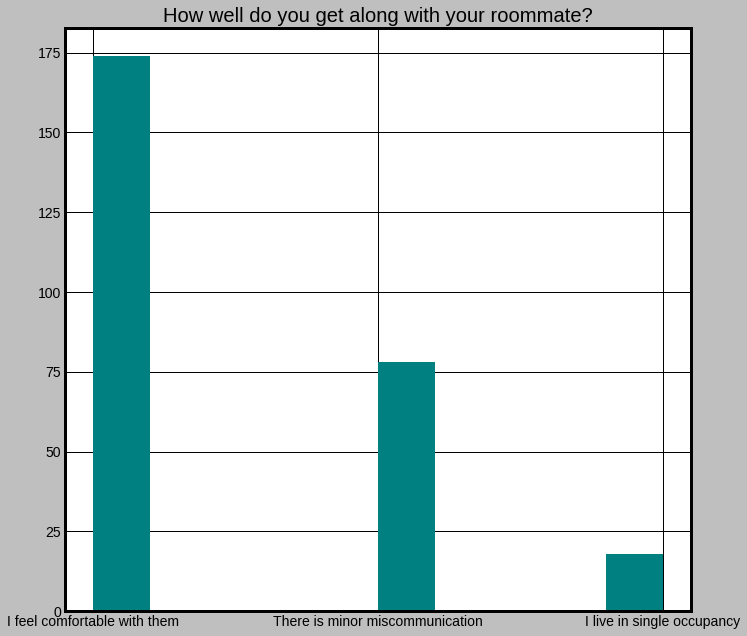

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


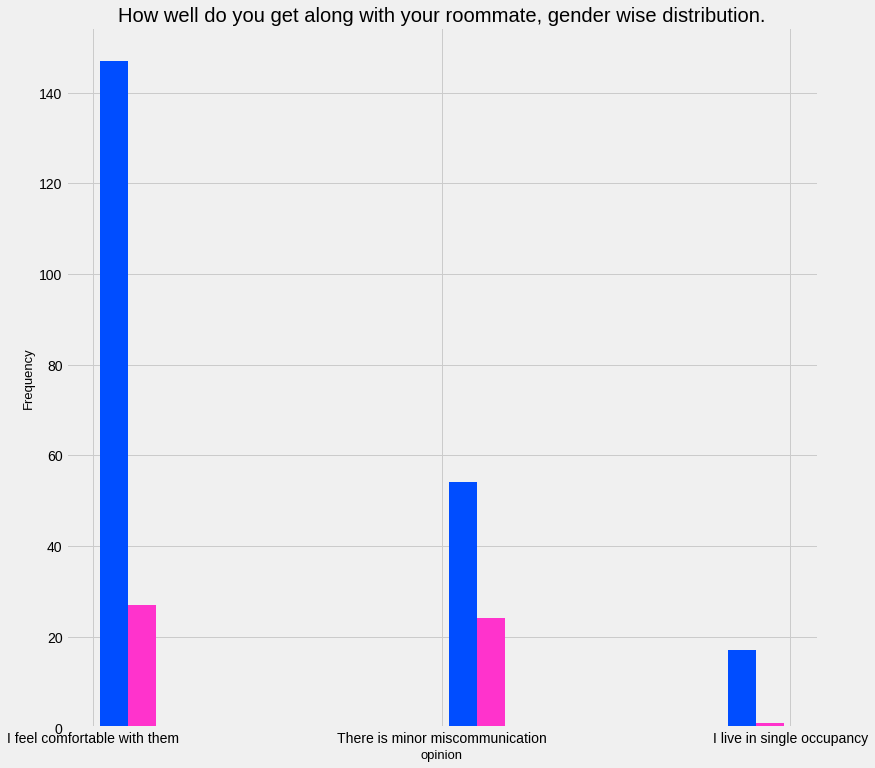

In [149]:
### Let us try to understand how people feel about their roommate:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,10))
plt.hist(cleaned_df['Do you get along with your roommate?'], color = 'teal')
plt.title('How well do you get along with your roommate?')
#plt.xticks(rotation = 90)
plt.show()

##Now let us analyze this genderwise:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,12))
plt.hist([cleaned_df[male].iloc[:, 9], cleaned_df[female].iloc[:, 9]], color=[blue, pink])
plt.xlabel("opinion", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('How well do you get along with your roommate, gender wise distribution.')
plt.show()

In [150]:
### Let us find the satisfaction scores of the first 2 categories:
#Making the dataset.
good = (cleaned_df.iloc[:, 9] == 'I feel comfortable with them')
bad = (cleaned_df.iloc[:, 9] == 'There is minor miscommunication')

# Finding the mean and variance in the ratings:
avg_score_good = cleaned_df[good].iloc[:, 18].sum()/cleaned_df[good].shape[0]   # Mean and Variance for students getting well along with their roommates

squared_sum = 0
for i in cleaned_df[good].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[good].shape[0]
var_good = squared_avg - avg_score_good**2

avg_score_bad = cleaned_df[bad].iloc[:, 18].sum()/cleaned_df[bad].shape[0]      # Mean and Variance for students having miscommunication with their roommates.

squared_sum = 0
for i in cleaned_df[bad].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[bad].shape[0]
var_bad = squared_avg - avg_score_bad**2

# Printing the scores:
print('Students who feel comfortable with their roommates:')
print('Avg. Score : ', avg_score_good)
print('Variance in Score : ', var_good, '\n')

print('Students who have miscommunication issues with their roommates:')
print('Avg. Score : ', avg_score_bad)
print('Variance in Score : ', var_bad, '\n')

### OBSERVATION:
#   We see that the average satisfaction of both the groups is almost the same with almost equal variance.
#   We therefore wish to conclude that this fact doesn't have much to do with the satisfaction of an IIT student.
#   One last this before we do this is to plot the distribution for the same.


Students who feel comfortable with their roommates:
Avg. Score :  2.9770114942528734
Variance in Score :  1.4362531377989178 

Students who have miscommunication issues with their roommates:
Avg. Score :  2.8076923076923075
Variance in Score :  1.2066074950690346 



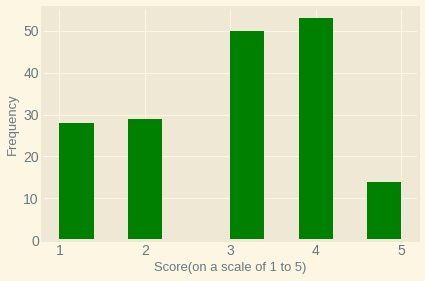

Histogram of how students getting along with their roommate feel about the returns they are getting from the institute life compared to what they expected.



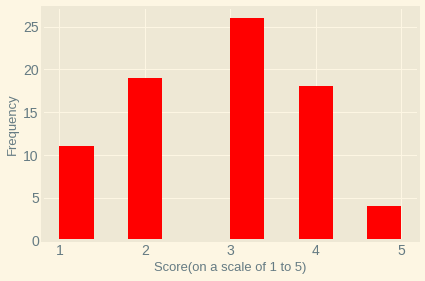

Histogram of how students having miscommunication with their roommate feel about the returns they are getting from the institute life compared to what they expected.



In [151]:
### Ploting the histogram:
plt.style.use('Solarize_Light2')
plt.hist(cleaned_df[good].iloc[:, 18], color = 'green')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Histogram of how students getting along with their roommate feel about the returns they are getting from the institute life compared to what they expected.\n')

plt.hist(cleaned_df[bad].iloc[:, 18], color = 'red')
plt.xlabel("Score(on a scale of 1 to 5)", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.show()
print('Histogram of how students having miscommunication with their roommate feel about the returns they are getting from the institute life compared to what they expected.\n')

### OBSERVATION:
#   We see that the mode of students satisfied with their roommate is 4 which is above that of those having miscommunication issues.
#   This was an expected trent however doesn't seem very dominating observing the satisfaction scores. 

## Analysis on other numerical parameters:

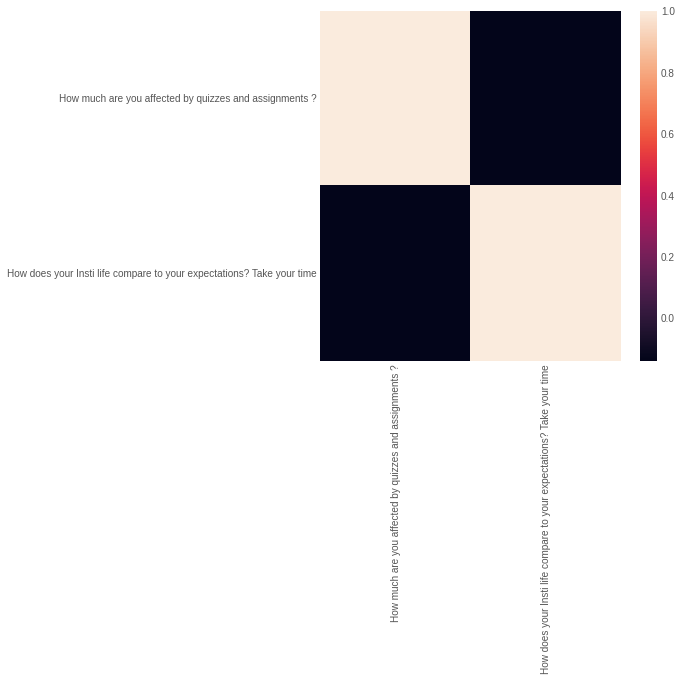

In [152]:
### Let us analyze the effect of quizes on expectations to returns ratio gauged by the students.
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
sb.heatmap(cleaned_df.iloc[:,[11,18]].corr())                                  #plots the correlation matrix.
plt.show() 

### OBSERVATION: 
#   We see a negative correlation between the two.
#   This was our expectation because the ones to be greatly affected by quiz may not have a good return on their institute life due to the trade-off between achievement and
#   satisfaction.
 

## Coping Up with the offline setting

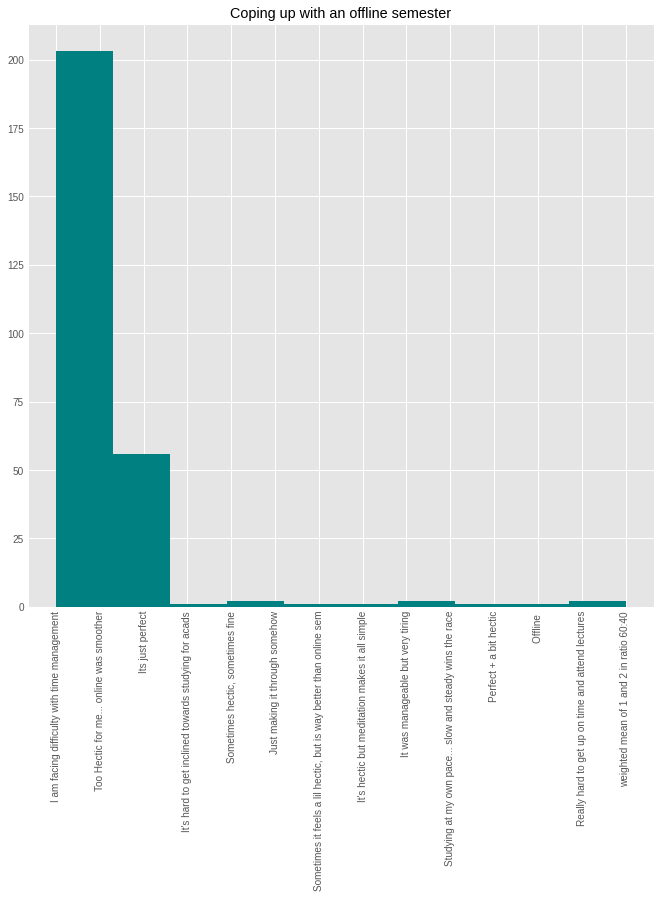

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


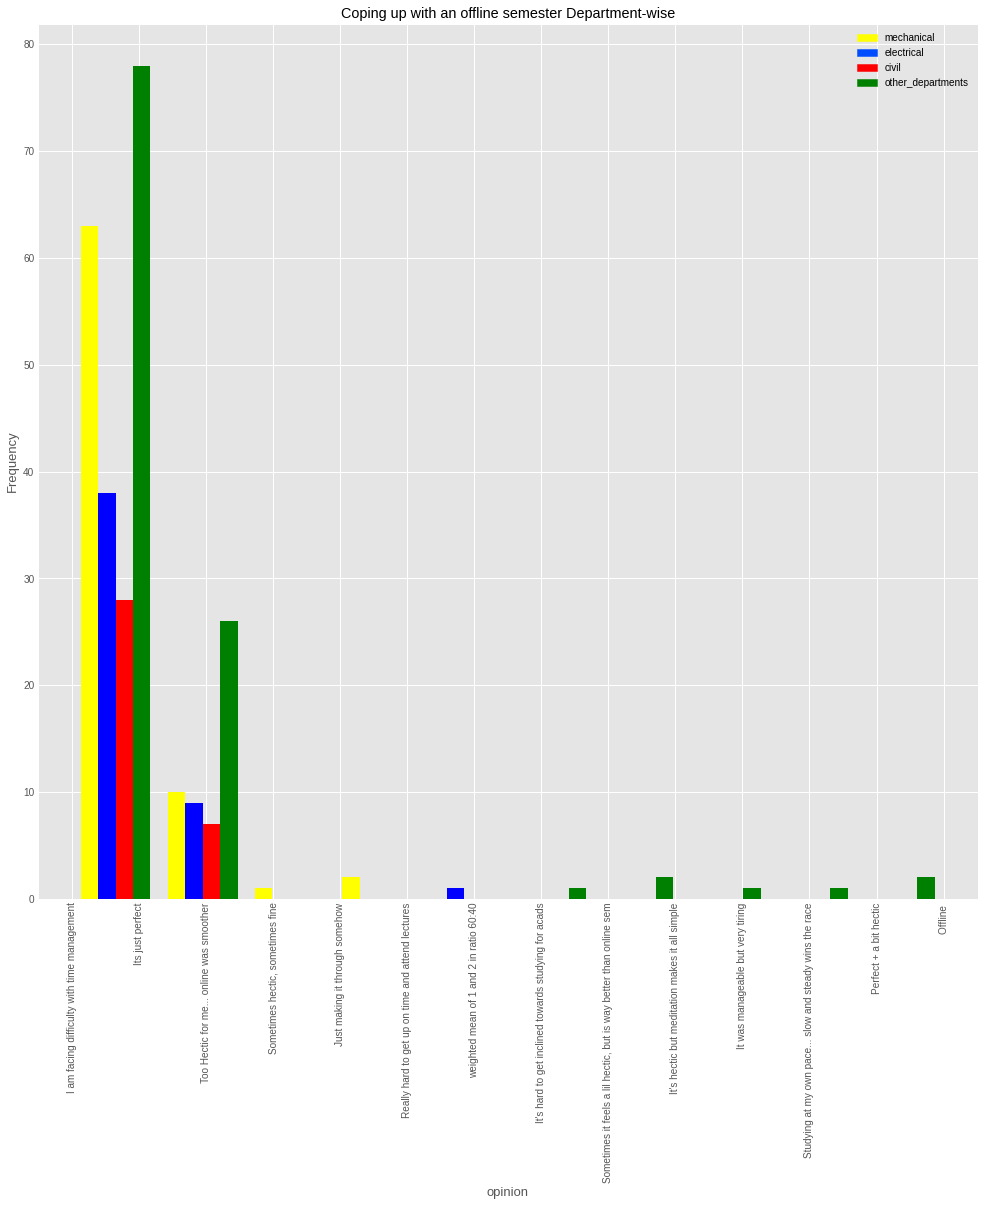

In [153]:
## Let us see how students are coping up with the offline semester.

# Make a basic plot.
plt.figure(figsize=(10,10))
plt.hist(cleaned_df['How well are you coping up with the offline semester?'], color = 'teal')
plt.title('Coping up with an offline semester')
plt.xticks(rotation = 90)
plt.show()

# OBSERVATION:
# We see that more than 50% of stundents are facing issues related to time management.
# The second most popular option is a tie between students who feel that online was smoother for them vs. those who feel offline is perfect.

#Let us try and analyze these categories branch-wise.

yellow_patch = mpatches.Patch(color='yellow', label='mechanical')
blue_patch = mpatches.Patch(color=blue, label='electrical')
red_patch = mpatches.Patch(color='red', label='civil')
green_patch = mpatches.Patch(color='green', label='other_departments')

plt.figure(figsize=(15,15))
plt.hist([cleaned_df[mechanical].iloc[:, 15], cleaned_df[electrical].iloc[:, 15], cleaned_df[civil].iloc[:, 15], cleaned_df[other_dept].iloc[:, 15]], color=['yellow','blue','red','green'])
plt.xlabel("opinion", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.legend(handles=[yellow_patch, blue_patch, red_patch, green_patch])
plt.title('Coping up with an offline semester Department-wise')
plt.xticks(rotation = 90)
plt.show()

### OBSERVATION:
#   The students from mechanical and electrical department are facing time management issues more compared with students of other branches.
#   This was inference by the ratio of student in the first 2 columns of the histogram.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


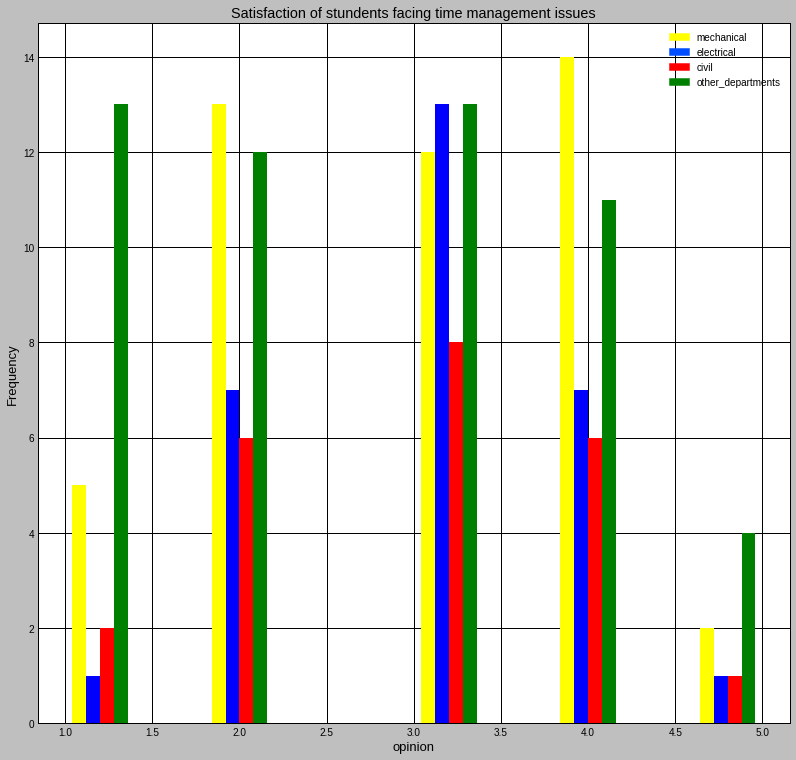

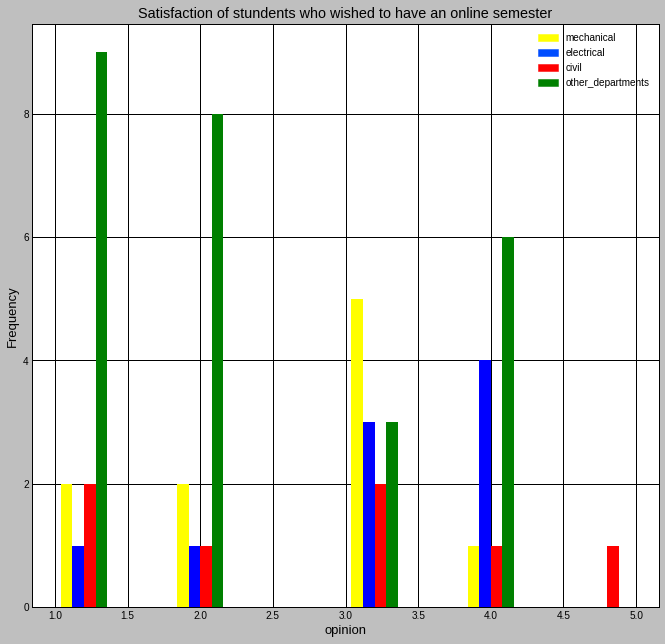

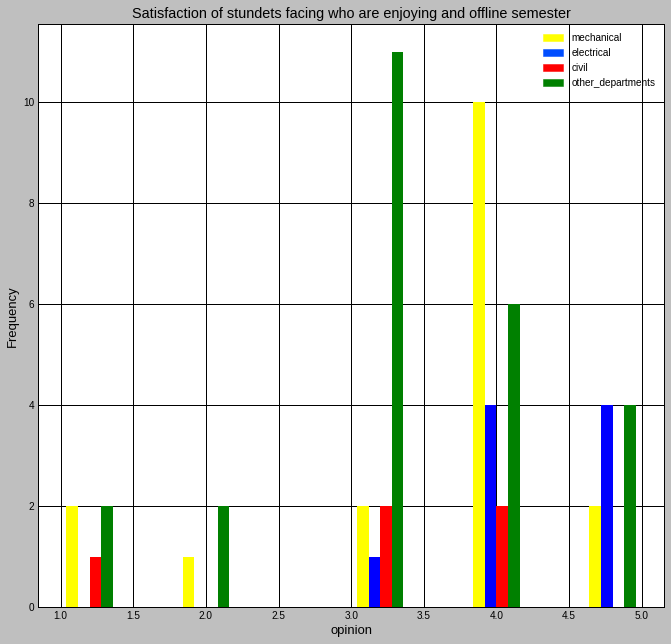

In [154]:
#Making the datasets.
time_m = (cleaned_df.iloc[:, 15] == 'I am facing difficulty with time management')
offline = (cleaned_df.iloc[:, 15] == 'Its just perfect')
online = (cleaned_df.iloc[:, 15] == 'Too Hectic for me... online was smoother')

time_management = cleaned_df[time_m]                                            #creating actual data sets here.
offline_s = cleaned_df[offline]
online_s = cleaned_df[online]

### Now filtering department-wise.
mechanical_t = (time_management['What is you department?'] == 'Mechanical')
electrical_t = (time_management['What is you department?'] == 'Electrical')
civil_t = (time_management['What is you department?'] == 'Civil')
other_dept_t = (time_management['What is you department?'] != 'Mechanical')&(time_management['What is you department?'] != 'Electrical')&(time_management['What is you department?'] != 'Civil')

mechanical_on = (online_s['What is you department?'] == 'Mechanical')
electrical_on = (online_s['What is you department?'] == 'Electrical')
civil_on = (online_s['What is you department?'] == 'Civil')
other_dept_on = (online_s['What is you department?'] != 'Mechanical')&(online_s['What is you department?'] != 'Electrical')&(online_s['What is you department?'] != 'Civil')

mechanical_off = (offline_s['What is you department?'] == 'Mechanical')
electrical_off = (offline_s['What is you department?'] == 'Electrical')
civil_off = (offline_s['What is you department?'] == 'Civil')
other_dept_off = (offline_s['What is you department?'] != 'Mechanical')&(offline_s['What is you department?'] != 'Electrical')&(offline_s['What is you department?'] != 'Civil')

### Now it is time to plot these filters.
#   We shal make the satisfaction score plots of the same.
yellow_patch = mpatches.Patch(color='yellow', label='mechanical')
blue_patch = mpatches.Patch(color=blue, label='electrical')
red_patch = mpatches.Patch(color='red', label='civil')
green_patch = mpatches.Patch(color='green', label='other_departments')

plt.style.use('grayscale')
plt.figure(figsize=(12,12))
plt.hist([time_management[mechanical_t].iloc[:, 18], time_management[electrical_t].iloc[:, 18], time_management[civil_t].iloc[:, 18], time_management[other_dept_t].iloc[:, 18]], color=['yellow','blue','red','green'])
plt.xlabel("opinion", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.legend(handles=[yellow_patch, blue_patch, red_patch, green_patch])     
plt.title('Satisfaction of stundents facing time management issues')
plt.show()

plt.figure(figsize=(10,10))
plt.hist([online_s[mechanical_on].iloc[:, 18], online_s[electrical_on].iloc[:, 18], online_s[civil_on].iloc[:, 18], online_s[other_dept_on].iloc[:, 18]], color=['yellow','blue','red','green'])
plt.xlabel("opinion", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.legend(handles=[yellow_patch, blue_patch, red_patch, green_patch])   
plt.title('Satisfaction of stundents who wished to have an online semester')
plt.show()

plt.figure(figsize=(10,10))
plt.hist([offline_s[mechanical_off].iloc[:, 18], offline_s[electrical_off].iloc[:, 18], offline_s[civil_off].iloc[:, 18], offline_s[other_dept_off].iloc[:, 18]], color=['yellow','blue','red','green'])
plt.xlabel("opinion", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.legend(handles=[yellow_patch, blue_patch, red_patch, green_patch])
plt.title('Satisfaction of stundets facing who are enjoying and offline semester')
plt.show()

### OBSERVATIONS:
#   Although a large number of mechanical engineering students were facing time management issue, they are yet satisfied by what the institute has in store for them.(Mode: 4)
#   People from different departments who wished to have an online semester are not satisfied by the institute offerings.
#   A large number of electrical students enjoying the offline semester are satisfied by the institute environment.(Ratings only in 4s and 5s)

## Analyzing Social life satisfaction:

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


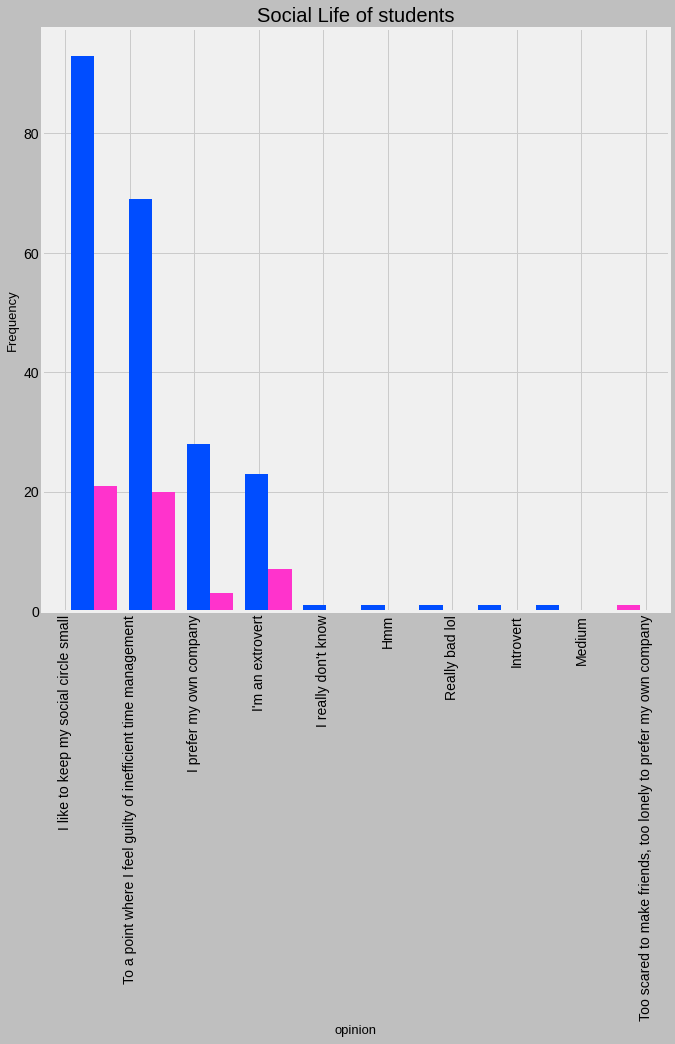

In [155]:
### Let us start with a simple male-female split histogram here.
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.hist([cleaned_df[male].iloc[:, 13], cleaned_df[female].iloc[:, 13]], color=[blue, pink])
plt.xlabel("opinion", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('Social Life of students')
plt.xticks(rotation = 90)
plt.show()

### We see 2 interesting categories here which we can further analyze.
#   1. People who like to keep a small but close social circle.
#   2. People who waste a lot of time in socialization(big social circle).

In [156]:
### Making datasets for the two.
small_sc = (cleaned_df.iloc[:, 13] == 'I like to keep my social circle small')
big_sc = (cleaned_df.iloc[:, 13] == 'To a point where I feel guilty of inefficient time management')

small_sc_m = (males.iloc[:, 13] == 'I like to keep my social circle small')
small_sc_f = (females.iloc[:, 13] == 'I like to keep my social circle small')
big_sc_m = (males.iloc[:, 13] == 'To a point where I feel guilty of inefficient time management')
big_sc_f = (females.iloc[:, 13] == 'To a point where I feel guilty of inefficient time management')

### Computing avg. satisfaction scores:
# Male + Female
avg_score_small_sc =cleaned_df[small_sc].iloc[:, 18].sum()/cleaned_df[small_sc].shape[0]  # Mean and Variance of satisfactions scores for students with a small social circle.

squared_sum = 0
for i in cleaned_df[small_sc].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[small_sc].shape[0]
var_small_sc = squared_avg - avg_score_small_sc**2

avg_score_big_sc =cleaned_df[big_sc].iloc[:, 18].sum()/cleaned_df[big_sc].shape[0]        # Mean and Variance of satisfactions scores for students with large social circles.

squared_sum = 0
for i in cleaned_df[big_sc].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/cleaned_df[big_sc].shape[0]
var_big_sc = squared_avg - avg_score_big_sc**2

# Only Male students:
avg_score_small_sc_m =males[small_sc_m].iloc[:, 18].sum()/males[small_sc_m].shape[0]      # Mean and Variance of satisfactions scores for male students with a small social circle.

squared_sum = 0
for i in males[small_sc_m].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/males[small_sc_m].shape[0]
var_small_sc_m = squared_avg - avg_score_small_sc_m**2

avg_score_big_sc_m =males[big_sc_m].iloc[:, 18].sum()/males[big_sc_m].shape[0]            # Mean and Variance of satisfactions scores for male students with large social circles.

squared_sum = 0
for i in males[big_sc_m].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/males[big_sc_m].shape[0]
var_big_sc_m = squared_avg - avg_score_big_sc_m**2

# Only female students:
avg_score_small_sc_f =females[small_sc_f].iloc[:, 18].sum()/females[small_sc_f].shape[0]  # Mean and Variance of satisfactions scores for female students with a small social circle.

squared_sum = 0
for i in females[small_sc_f].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/females[small_sc_f].shape[0]
var_small_sc_f = squared_avg - avg_score_small_sc_f**2

avg_score_big_sc_f =females[big_sc_f].iloc[:, 18].sum()/females[big_sc_f].shape[0]        # Mean and Variance of satisfactions scores for female students with large social circles.

squared_sum = 0
for i in females[big_sc_f].iloc[:, 18]:
  squared_sum+=(i**2)
squared_avg = squared_sum/females[big_sc].shape[0]
var_big_sc_f = squared_avg - avg_score_big_sc_f**2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [157]:
### Let Us analyze these scores:
print('Satisfaction Analysis for all Students:')
print('Satisfaction of students with a small but close social cirlce:')
print('Avg. score : ', avg_score_small_sc)
print('Variance in score : ', var_small_sc, '\n')

print('Satisfaction of students with large social cirlces:')
print('Avg. score : ', avg_score_big_sc)
print('Variance in score : ', var_big_sc, '\n')

print('\nSatisfaction Analysis for only Male Students:')
print('Satisfaction of male students with a small but close social cirlce:')
print('Avg. score : ', avg_score_small_sc_m)
print('Variance in score : ', var_small_sc_m, '\n')

print('Satisfaction of male students with large social cirlces:')
print('Avg. score : ', avg_score_big_sc_m)
print('Variance in score : ', var_big_sc_m, '\n')

print('\nSatisfaction Analysis for only female Students:')
print('Satisfaction of female students with a small but close social cirlce:')
print('Avg. score : ', avg_score_small_sc_f)
print('Variance in score : ', var_small_sc_f, '\n')

print('Satisfaction of female students with large social cirlces:')
print('Avg. score : ', avg_score_big_sc_f)
print('Variance in score : ', var_big_sc_f, '\n')

### OBSERVATION ON DATA:
#   The below numbers speak quite well about the students. Observe that people with small but close social circles seem to be more satisfied that too with low variance.
#   This shows that people belonging in large social circles are on an average less satisfied with what the institute has to offer and believe in enjoying their social life
#   on their own terms.

### Now finally lets us comfirm this fact using histograms. 

Satisfaction Analysis for all Students:
Satisfaction of students with a small but close social cirlce:
Avg. score :  3.1491228070175437
Variance in score :  1.1795167743921215 

Satisfaction of students with large social cirlces:
Avg. score :  2.640449438202247
Variance in score :  1.533644741825527 


Satisfaction Analysis for only Male Students:
Satisfaction of male students with a small but close social cirlce:
Avg. score :  3.161290322580645
Variance in score :  1.1675338189386064 

Satisfaction of male students with large social cirlces:
Avg. score :  2.6231884057971016
Variance in score :  1.4232304137786178 


Satisfaction Analysis for only female Students:
Satisfaction of female students with a small but close social cirlce:
Avg. score :  3.0952380952380953
Variance in score :  1.229024943310657 

Satisfaction of female students with large social cirlces:
Avg. score :  2.7
Variance in score :  1.9099999999999984 



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Legend:
Yellow : Students with small but close social circle.
Green : Students with large social circles.


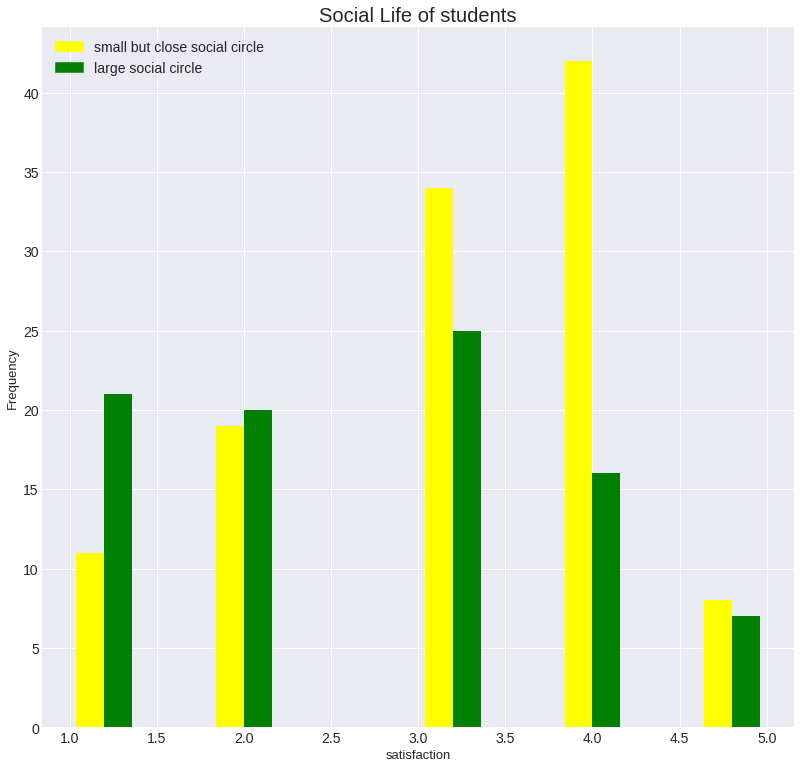


 Plot for males:


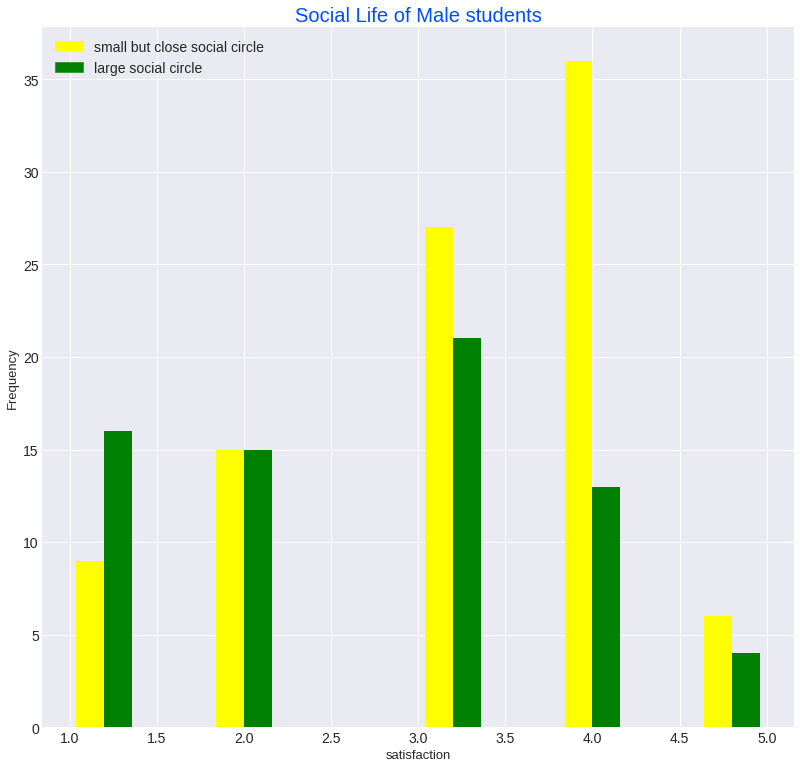


 Plot for females:


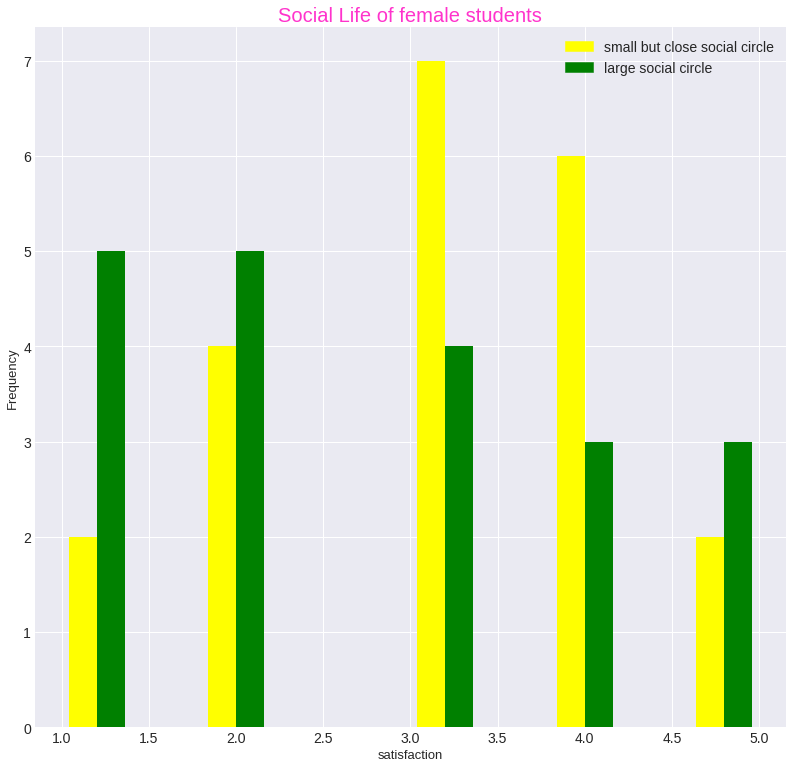

In [158]:
### Ploting histograms:
yellow_patch = mpatches.Patch(color='yellow', label='small but close social circle')
green_patch = mpatches.Patch(color='green', label='large social circle')

plt.style.use('seaborn-darkgrid')
print('Legend:')                                                                #fix this
print('Yellow : Students with small but close social circle.')
print('Green : Students with large social circles.')
plt.figure(figsize=(12,12))
plt.hist([cleaned_df[small_sc].iloc[:, 18], cleaned_df[big_sc].iloc[:, 18]], color=['yellow', 'green'])
plt.xlabel("satisfaction", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('Social Life of students')
plt.legend(handles=[yellow_patch, green_patch])
plt.show()

print('\n Plot for males:')
plt.figure(figsize=(12,12))
plt.hist([males[small_sc_m].iloc[:, 18], males[big_sc_m].iloc[:, 18]], color=['yellow', 'green'])
plt.xlabel("satisfaction", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('Social Life of Male students', color = blue)
plt.legend(handles=[yellow_patch, green_patch])
plt.show()

print('\n Plot for females:')
plt.figure(figsize=(12,12))
plt.hist([females[small_sc_f].iloc[:, 18], females[big_sc_f].iloc[:, 18]], color=['yellow', 'green'])
plt.xlabel("satisfaction", fontsize=13)  
plt.ylabel("Frequency", fontsize=13)
plt.title('Social Life of female students', color = pink)
plt.legend(handles=[yellow_patch, green_patch])
plt.show()

### OBSERVATIONS:
#   We observe the contrast of frequency in the higher numbers of satisfaction scores looking at the graphs below.
#   People with smaller social circles are more satisfied with their institute life. 

## Scatter Plots:

How much are you affected by quizzes and assignments ?  How does your Insti life compare to your expectations? Take your time
1                                                       1                                                                         2
                                                        2                                                                         6
                                                        3                                                                         6
                                                        4                                                                         1
                                                        5                                                                         4
2                                                       2                                                                         3
                                                        3                         

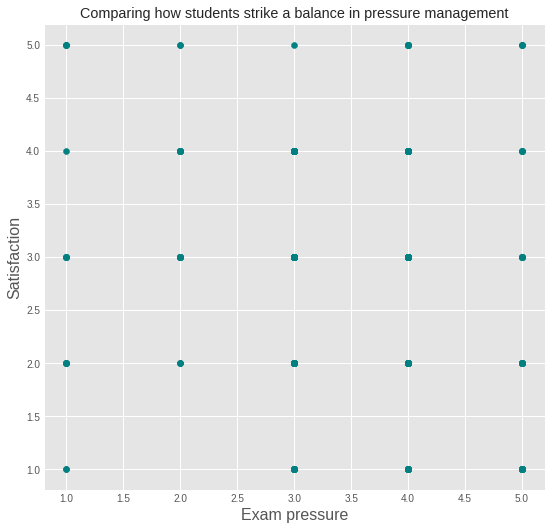

In [159]:
# grouping data.
grouping3 = cleaned_df.groupby(['How much are you affected by quizzes and assignments ?', 'How does your Insti life compare to your expectations? Take your time']).size()
print(grouping3)      

# Let us try to analyze the data using scatter plots.
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.scatter('How much are you affected by quizzes and assignments ?', 'How does your Insti life compare to your expectations? Take your time', data=cleaned_df, color='teal')
#edit s
plt.xlabel("Exam pressure", size=16)
plt.ylabel("Satisfaction", size=16)
plt.title('Comparing how students strike a balance in pressure management')
plt.show()

## References



https://stackoverflow.com/questions/43831029/matplotlib-seaborn-histogram-using-different-colors-for-grouped-bins

https://matplotlib.org/stable/gallery/color/colormap_reference.html
